In [9]:
from numpy import *
from scipy import *
import numpy as np
from matplotlib import *

from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import xlrd
import xlsxwriter

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
Eff = Data.sheet_by_name('Eff')


Effect = []

for i in range(7):
     Effect.append(array(Eff.col_values(i)))

phi = np.arange(0.1,2.01,0.1)
NTU = np.arange(50,351,50)
NN,PP = np.meshgrid(NTU,phi)
Effectiv = interpolate.interp2d(phi,NTU,Effect,kind = 'linear')

In [3]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Cold')

m_f_HEx_c   = array(HEx.col_values(0)) 
Ec_HEx_c   = array(HEx.col_values(1)) 
W_T_HEx_c   = array(HEx.col_values(2)) 
W_f_HEx_c   = array(HEx.col_values(3)) 
W_p_HEx_c   = array(HEx.col_values(4)) 

In [4]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Hot')

m_f_HEx_h   = array(HEx.col_values(0)) 
Ec_HEx_h   = array(HEx.col_values(1)) 
W_T_HEx_h   = array(HEx.col_values(2)) 
W_f_HEx_h   = array(HEx.col_values(3)) 
W_p_HEx_h   = array(HEx.col_values(4)) 

def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    for i in range(A,B):
        print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[C]) and ECr < Ec_HEx[i]:
            C = i
            #print('oic',C)
    for i in range(B,A,-1):
        print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[D]) and ECr > Ec_HEx[i]:
            D = i
            #print('oid',D)
    print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [5]:
def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    #print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    #print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    Ref_C = 1
    Ref_D = 0
    for i in range(A,B):
        #print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_C) and ECr < Ref_C:
            C = i
            Ref_C = Ec_HEx[i]
            #print('oic',C)
    for i in range(B,A,-1):
        #print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_D) and ECr > Ref_D:
            D = i
            Ref_D = Ec_HEx[i]
            #print('oid',D)
    #print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [3]:
def Radius(X): 
    R2,R3,B,L_m,L_r,h = X
    #return (1.41634776*(R2**-1.10684344)*(R3**2.08169412)*(B**0.74232364))
    #return((B/((0.7390256*R2**1.49668268*R3**-2.71694101)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.23379933))
    #return((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    return((B/((0.99497192*R2**1.55620764*R3**(-2.77937455))*np.exp(-0.92376442*(R3-R2)/L_m)*(h**0.08060702)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.1223844))

In [59]:
def MField(X,a,b,c,d,e):
    w,x,y,z = X
    R1 = (x**b)*w
    R2 = np.exp(-c/y)
    R3 = (np.tanh(d*z))+e
    R = a*(R1*R2*R3)
    return R

In [8]:
R3 = (np.tanh(0.66936258*0))+3.10786531
R3

3.10786531

In [75]:
R2 = np.arange(100,200,10)
h_gap = np.arange(20,50,10)
H_rot = np.arange(50,200,10)
L_magnet = np.arange(100,300,20)
h_fc = np.arange(10,100,10)

In [76]:
L_magnet

array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280])

In [77]:
R2 = 160
R3 = 210
R4 = 360
R5 = 360+30
L = 200

V_gap  = R3**2-R2**2
V_out = R4**2 - R3**2
V_hf = R5**2 - R4**2

X = (1.43,V_gap/V_out,L,V_hf/V_out)

In [78]:
0.13534654*1.43*(V_gap/V_out)**-0.46031427 *(np.tanh(0.66936258*(V_hf/V_out))+3.10786531)

1.2851813376510592

In [79]:
B = MField(X,0.13534654, -0.46031427, 26.03415838,  0.66936258,  3.10786531)
B

1.1283191362692808

In [80]:
R2 = 180
R3 = 220
L = 200
R_5 = 500
R_4 = np.arange(221,R_5,1)
h = R_5 - R_4

for i in range(len(R_4)):
    B[i] = MField((1.43,V_gap/V_out[i],L,V_hf[i]/V_out[i]),0.13534654, -0.46031427, 26.03415838,  0.66936258,  3.10786531)

TypeError: 'int' object is not subscriptable

In [169]:
def MagField(X,a,b,c,d,e,f):
    R2,R3,R4,h,L,B_rem = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(h**f))

In [170]:
def MField(X,a,b,c,d,e):
    V_gap,V_mag,V_out,L,B_rem,R_4 = X
    return (a*(B_rem)*((V_gap/V_mag)**b)*(np.exp(c*R_4/L))*(np.tanh(d*(V_out/V_mag))+e))

In [176]:
def MField_2(X,a,b,c,d,e,f,g):
    R2,R3,R4,L,B_rem,R5 = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(np.tanh(f*(R5**2-R4**2)/(R4**2-R3**2))+g))

In [196]:
R2 = 200
R3 = 230
L = 200
h = np.arange(10,41,1)
R_5 = 400*np.ones(len(h))
R_4 = R_5 - h



#R_4 = 350*np.ones(len(h))
#h = np.arange(10,41,1)
#R_5 = R_4 + h
#V_gap  = R3**2-R2**2
#V_out = R_4**2 - R3**2
#V_hf = R_5**2 - R_4**2


B = np.zeros(len(R_4))
B1 = np.zeros(len(R_4))
B2 = np.zeros(len(R_4))


for i in range(len(R_4)):
    B[i]  = MagField((R2,R3,R_4[i],h[i],L,1.43),1.21942137,  2.12682945, -3.59056376,  1.32273009, -0.88523986,0.07976582)
    B1[i] = MField((R3**2-R2**2,R_4[i]**2-R3**2,R_5[i]**2-R_4[i]**2,L,1.43,R_4[i]), 0.11275628, -0.55433261, -0.08821461,  1.10411026,  3.04308004)
    B2[i] = MField_2((R2,R3,R_4[i],L,1.43,R_5[i]),7.6350629 ,  2.05485415, -3.60881333,  1.5332548 , -0.90315524,0.03254254,  0.08822238)

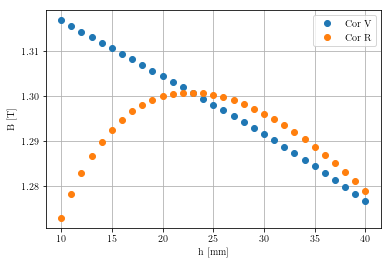

In [197]:
plt.plot(h,B1,'o',label = 'Cor V')
plt.plot(h,B,'o',label = 'Cor R' )
plt.legend()
plt.xlabel('h [mm]')
plt.ylabel('B [T]')
#plt.plot(h,B2,'o')
plt.grid()
plt.savefig('Dif_R5_fixo.png', format = 'png', dpi = 1000, bbox_inches = 'tight')

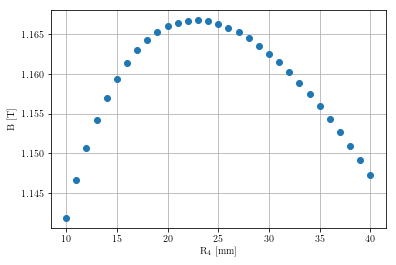

In [183]:
plt.plot(h,B,'o')
plt.grid()
plt.xlabel('R$_4$ [mm]')
plt.ylabel('B [T]')
plt.savefig('Capa.png',format = 'png', dpi=500,bbox_inches='tight')

In [20]:
B = []
R_2 = []
R_3 = []
R_4 = []
R_5 = []
L_m = []

n = 0

for i in range(len(R2)):
    for j in range(len(h_gap)):
        for k in range(len(H_rot)):
            for l in range(len(L_magnet)):
                for m in range(len(h_fc)):
                    R_2.append(R2[i])
                    R_3.append(R2[i]+h_gap[j])
                    R_4.append(R2[i]+h_gap[j]+H_rot[k])
                    R_5.append(R2[i]+h_gap[j]+H_rot[k]+h_fc[m])
                    L_m.append(L_magnet[l])
                    V_gap = ((R2[i]+h_gap[j])**2 - (R2[i])**2)
                    V_out = ((R2[i]+h_gap[j]+H_rot[k])**2 - (R2[i]+h_gap[j])**2)
                    V_rot = ((R2[i]+h_gap[j]+H_rot[k]+h_fc[m])**2 - (R2[i]+h_gap[j]+H_rot[k])**2)
                    X = ([1.43,V_gap/V_out,L_magnet,V_rot/V_out])
                    
                    B_mag = MField(X,0.13534654, -0.46031427, 26.03415838,  0.66936258,  3.10786531)
                    
                    B.append(B_mag)

In [69]:
V_rotor = (np.array(R_4)**2 - np.array(R_3)**2)*np.array(L_m)*10**-9
V_outter = (np.array(R_5)**2 - np.array(R_4)**2)*np.array(L_m)*10**-9
V_t = (np.array(R_5)**2-np.array(R_3)**2+np.array(R_2)**2)*np.array(L_m)*10**-9

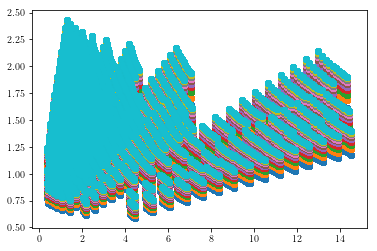

In [71]:
plt.plot(V_rotor/V_outter,B,'o')

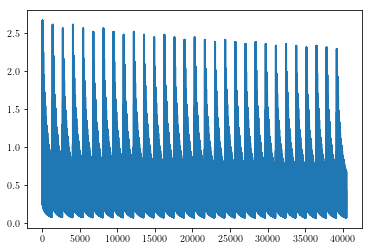

In [79]:
plt.plot(V_outter/V_rotor)

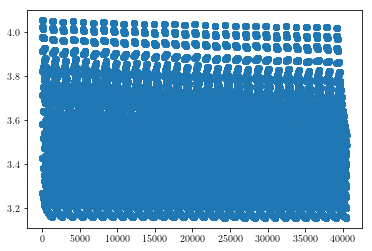

In [78]:
plt.plot(np.tanh(0.66936258*(V_outter/V_rotor))+3.10786531,'o')

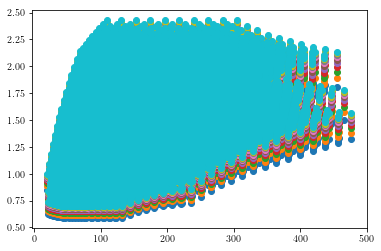

In [53]:
plt.plot((np.array(R_5)**2-np.array(R_3)**2+np.array(R_2)**2)*np.array(L_m)*10**-9*7000,B,'o')

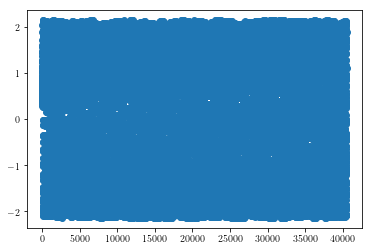

In [45]:
plt.plot(V,'o')

In [840]:
def Qc(X): 
    P1,P2,P3,P4,P5= X #Q_pas_CB,Q_act_CB,Q_span,W_mag,W_p
    #return( 0.44774473*P1+0.69113695*P2-0.46543184*P3+0.02740828*P4-1.2412753 *P5)
    return(0.271043*P1+0.49653155*P2-0.28565907*P3+1*P4-1.13502211*P5)

In [841]:
def Qh(X): 
    P1,P2,P3,P4,P5= X

    #return(0.46673225*P1+1.40322589*P2-0.49908018*P3+0.01575257*P4-0.68914607*P5)
    return(0.36735687*P1+1*P2-0.38713269*P3+1*P4-0.21881993*P5)

In [845]:
def W_m(X):
    P1,P2,P3 = X
    #a = 0.00541105
    a = 0.00937193
    #b = -2.21029128
    b = -0.99809109
    c = 2.84461382
    #c = 4.33008264
    #d = 2.85861479
    d = 1.61088792
    return(a*P1**b*P2**c*P3**d )

In [846]:
def W_Hex(X):
    P1,P2 = X
    return (a*P1**b + c*P2**d)

In [847]:
def Prop_param(X):
    T_c,T_h,B = X
    C_H = 1.65161038/100*T_c+2.59946197*T_h-1.14324309*100*B
    C_L = 10.16443738*T_c-5.32568341*T_h-0.71305997*B
    dT_mg = -0.01057708*T_c+0.01163704*T_h+1.73509682*B
    dT_dmg = -0.01229483*T_c+0.01376157*T_h+0.76454655*B
    CdT_mg = -9.517569*T_c+11.49711993*T_h+820.04168503*B
    CdT_dmg = 4.39480124*T_c-7.07931118/10*T_h+9.15928168*100*B
    return(C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg)

In [848]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

L   = array(Inputs.col_values(0)) #Import AMR Length [mm]
H   = array(Inputs.col_values(1)) #Import AMR Height [mm]
W   = array(Inputs.col_values(2)) #Import AMR Width [mm]
T_c = array(Inputs.col_values(3))+273.15 #Import temperature span [K]
T_h = array(Inputs.col_values(4))+273.15 #Import temperature span [K]
B   = array(Inputs.col_values(5)) #Import magnetic field [T]
f   = array(Inputs.col_values(6)) #Import frequency [Hz]
m_f = array(Inputs.col_values(7))/3600 #Import mass flow rate [kg/h]
Q_c = array(Inputs.col_values(8)) #Import Cooling capacity [W]
Q_h = array(Inputs.col_values(9)) #Import Rejected heat [W]
W_p = array(Inputs.col_values(10)) #Import Pumping power [W]
W_ma = array(Inputs.col_values(11)) #Import Magnetic power [W]
T_c_ml = array(Inputs.col_values(12))+273.15 #Import temperature span [K]
T_h_ml = array(Inputs.col_values(13))+273.15 #Import temperature span [K]

Calculation

In [873]:
def Optimal(m_f,FE,f,L,H,W,B,Tc,Th,Tce,The,L_xt):
    
    ##Properties of the solid 
    #rho_s = 7900  #[kg/m3] Density of the solid
    #k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

    ## Propertis of the fluid
    #rho_f = 1000  #[kg/m3] Density of the fluid
    #c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
    #Pr_f  = 6.136 #[-] Prandtl of the fluid
    #mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
    #k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

    ## Porous medium
    #d_p = 500*10**(-6) #[m] Particle diameter
   
    #Epsilon = 0.45 #0.55  #[-] Porosity
    #Epsilon_dp = 0.36 #0.465 #[-] Porosity
    d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
        
    #Magnetic Circuit
    #B_rem = 1.43
    #N_p = 2
    #N_Rp = 2
    
    ### CALCULATION ###
    
    #Porous medium
    
    t_h = 2.5
    t_w = 2.5
    N_reg = 4/FE
    
    #Regenerador Quadrad
    R2 = [W/2+t_w]/np.tan(np.pi/N_reg)-t_h
    R3 = np.sqrt((W/2)**2 + (R2+t_h+H)**2)+t_h
    
   
    
    #R_aux = np.sqrt((R2+t_h)**2-(W/2)**2)
    #R3 = np.sqrt((H+8+R_aux)**2+(W/2)**2)
    
    #Regenerador Circular
    
    #R_med = (4/FE)/(2*np.pi)*(W + 2*t_w)
    #R2 = R_med-(H/2+t_h)
    #R3 = R_med+(H/2+t_h)
    
    #A_st = H*W
    A_aux_st = np.pi/(4/FE)*((R3-t_h)**2-(R2+t_h)**2)
    A_st = A_aux_st[0]
    

    m_s   = L*A_st*10**-9*(1-Epsilon)*rho_s #mass of the AMR

    Beta = (1-Epsilon)*6/d_p
    v_s   = (m_f)/(rho_f*A_st*10**-6) #Superficial velocity

    #Dimensionless Numbers
    Re_dp = d_p*v_s*rho_f/(mu_f) #Reynolds number
    Nu = 2*(1+4*(1-Epsilon)/Epsilon)+((1-Epsilon)**0.5)*Re_dp**0.6*Pr_f**(1/3) # Nusselt number
    Pe = Re_dp*Pr_f
    h_int = Nu*k_f/d_p
    NTU_f  = h_int*Beta*(L*A_st*10**(-9))/(m_f*c_f) 
    #dP = (L/1000)*(150*(1-Epsilon_dp)**2*mu_f*v_s/(Epsilon_dp**3*d_p**2) + 1.75*(1-Epsilon_dp)*rho_f*v_s**2/(Epsilon_dp**3*d_p))
    
    dP = 0.5*413.11*(v_s*d_ph*rho_f/mu_f)**-0.514*rho_f*v_s**2*(L/1000)/d_ph
    #print(dP/dP_1)
    
    #Effective conduction
    #k_e_f = k_f*Epsilon #Fluid effective conduction

    #a_0 = exp(-1.084-6.778*(Epsilon-0.298))
    #f_0 = 0.8
    #k_e_s = k_f*((1-a_0)*(Epsilon*f_0+(1-Epsilon*f_0)*k_s/k_f)/(1-Epsilon*(1-f_0)+k_s/k_f*Epsilon*(1-f_0))+a_0*(2*((k_s/k_f)**2)*(1-Epsilon)+(1+2*Epsilon)*k_s/k_f)/((2+Epsilon)*k_s/k_f+(1-Epsilon))) #Solid effective conduction

    #D_ = (k_f*rho_f/c_f)*0.75*Pe/2

    #k_s_eff = k_e_s
    #k_f_eff = k_e_f + rho_f*c_f*D_
    
    ##### Properties Calculation ######   
    C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg = Prop_param((Tce,The,B))

    ##### Porous media effectivness #####

    C_HB = ((m_f)*c_f)/(m_s*C_L*f)
    C_CB = ((m_f)*c_f)/(m_s*C_H*f)

    Efness_HB = Effectiv(C_HB/2,NTU_f)
    Efness_CB = Effectiv(C_CB/2,NTU_f)

    #print(Efness_HB,Efness_CB,h_int,Nu,v_s,Re_dp)


    ## Metrics ##
    Pi_4 = CdT_mg/CdT_dmg
    Pi_6 = ((m_f)*c_f)/(m_s*C_L*f)
    Pi_11 = ((m_f)*c_f)/(m_s*C_H*f)
    
    
    Q_pas_CB = Efness_CB*(The - Tce)*m_f*FE*c_f
    Q_act_CB = dT_mg*m_f*c_f*FE

    Q_pas_HB = Efness_HB*(The - Tce)*m_f*FE*c_f
    Q_act_HB = dT_dmg*m_f*c_f*FE

    Q_span = (The - Tce)*m_f*c_f*FE
    #Q_cond = ((1-Epsilon)*k_s_eff + Epsilon*k_f_eff)*(W*H*10**-6)*(The-Tce)/L
    W_mag  = m_s*f*(CdT_mg - CdT_dmg)
    W_mag = m_s*f*CdT_dmg*W_m((Pi_6,Pi_4,Pi_11))
    W_pump = dP*m_f/rho_f*2*(FE)
    #print(Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump)

    ######Calculation#######
    
    FL = (0.45238549*(1+L_xt)**3-2.34797947*(1+L_xt)**2 +4.06737728*(1+L_xt)-1.44601011)*R2**-0.14716104*R3**(0.15172723)
    
    Qc_reg = Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump))*FL
    Qh_reg = Qh((Q_pas_HB,Q_act_HB,Q_span,W_mag,W_pump))*FL
    #print(Qc_reg,Qh_reg)
    #N_reg = Qc_target/Qc_reg
    Qc_target = Qc_reg*N_reg 
    Qh_target = Qh_reg*N_reg

    ECr_c = Qc_target/(FE*N_reg*m_f*c_f*(Tc-Tce))
    ECr_h = Qh_target/(FE*N_reg*m_f*c_f*(The-Th))
    
    B_rem = 1.43
    

    R4 = Radius((R2,R3,B/B_rem,L*(1+L_xt),L))
    

    
    #print(m_s,f,CdT_dmg,((Pi_6,Pi_4,Pi_11)))
    

    
    return (Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target,L_xt,FL)

Qc_rg = []
Qh_rg = []
W_pump_rg =[]
ECr_c = []
ECr_h = []
N_r = []
R2 = []
R3 = []
R4 = []

for i in range(len(L)):                          
    A1,A2,A3,A4,A5,A6,A7,A8,A9 = Optimal(m_f[i],0.25,f[i],L[i],H[i],W[i],B[i],22+273.15,35+273.15,T_c[i],T_h[i])
    Qc_rg.append(A1)
    Qh_rg.append(A9)
    W_pump_rg.append(A8)
    ECr_c.append(A2)
    ECr_h.append(A3)
    N_r.append(A6)
    R2.append(A6)
    R3.append(A5)
    R4.append(A4)

tan(Theta/2)
R2

W = 40
H = 20
A1 = W*H
t_w = 2
t_h = 2
Theta = 2*np.pi/16


R2 = (W/2)/np.tan(Theta/2)
R3 = np.sqrt((W/2)**2 + (R2+H)**2)    
A2 = (np.pi/16)*(R3**2-R2**2)



In [874]:
def A_ratio(W,H):
    A1 = W*H
    t_w = 2
    t_h = 2
    Theta = 2*np.pi/16
    
    
    R2 = (W/2)/np.tan(Theta/2)
    R3 = np.sqrt((W/2)**2 + (R2+H)**2)    
    A2 = (np.pi/16)*(R3**2-R2**2)
    
    return(A1/A2)

In [875]:
H = np.arange(10,60,1)
W = np.arange(30,80,1)
R_a = np.zeros([len(H),len(W)])
for i in range(len(H)):
    for j in range(len(W)):
        R_a[i][j] = A_ratio(W[j],H[i])

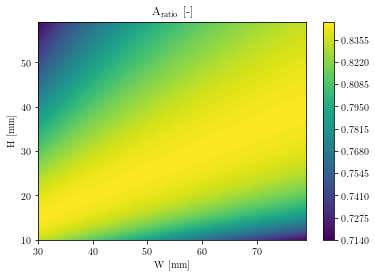

In [876]:
plt.contourf(W,H,R_a,100)
plt.colorbar()
plt.xlabel('W [mm]')
plt.ylabel('H [mm]')
plt.title('A$_\mathrm{ratio}$ [-]')
#plt.xlim([50,80])
#plt.ylim([25,45])
plt.savefig('Aratio.png',format = 'png', dpi=500,bbox_inches='tight')

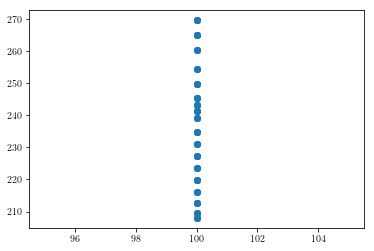

In [1240]:
plt.plot(L_p,m_p,'o')

In [1241]:
m_f = np.arange(650,1200,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(3,6.1,1)
L = np.arange(100,116,5)
H = np.arange(20,26,1)
W = np.arange(22,31,2)
B_max = np.arange(1.3,1.43,0.05)
Tce = np.arange(14,17,4)
The = np.arange(43,45,4)
L_xt = np.arange(0.15,0.45,0.05)
d_par = np.arange(800*10**-6,1001*10**-6,100*10**-6)

m_f = np.arange(800,801,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(1.5,1.9,0.5)
L = np.arange(150,159,10)
H = np.arange(50,51,5)
W = np.arange(60,61,5)
B_max = np.arange(1.3,1.34,0.05)
Tce = np.arange(14,15,2)
The = np.arange(42,43,2)
L_xt = np.arange(0.5,0.6,0.2)

In [1242]:
Epsilon = 0.55 #0.55  #[-] Porosity
Epsilon_dp = Epsilon - 0.09 #0.36 #0.465 #[-] Porosity
d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p

A = Optimal(800/3600,0.25,2,120,48,48,1.37,22+273.15,35+273.15,14+273.15,43+273.15,0.3)
A[0]/16

array([201.06244843])

(Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target,L_xt,FL)

In [1243]:

[6438.07171695] 673.0173213744445 6736.055555555555 -580.7984608854367 19.90084121294288

SyntaxError: invalid syntax (<ipython-input-1243-98dfb2bf6034>, line 2)

In [1244]:
len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)

30240

m_f = 600/3600
FE = 0.25
f = 2.25
L = 140
H = 20
W = 60
B_max = 1.5
T_c  = 22
T_h = 35
Tce = 14
The = 43

A = Optimal(m_f,FE,f,L,H,W,B_max,T_c+273.15,T_h+273.15,Tce+273.15,The+273.15,L_xt)
A[0][0]/16

In [1245]:
Q_c = []
cont = 0

T_c = 22
T_h = 35

Q_c_target = 3100

m_f_target = []
FE_target = []
f_target = []
L_target = []
H_target = []
W_target = []
Tce_target = []
The_target = []
ECr_c = []
ECr_h = []
R4 = []
R3 = []
R2 = []
W_mag = []
W_pump = []
B_target = []
Q_h = []
L_xt_target = []
FL_target = []
dp_target = []

##Properties of the solid 
rho_s = 7900  #[kg/m3] Density of the solid
k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

## Propertis of the fluid
rho_f = 1000  #[kg/m3] Density of the fluid
c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
Pr_f  = 6.136 #[-] Prandtl of the fluid
mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

## Porous medium


#Magnetic Circuit
B_rem = 1.43
N_p = 2
N_Rp = 2

for i in range(size(FE)):
    for j in range(len(f)):
        for k in range(len(L)):
            for l in range(len(H)):
                for m in range(len(W)):
                    for n in range(len(Tce)):
                        for o in range(len(The)):
                            for p in range(len(B_max)):
                                for q in range(len(L_xt)):
                                    for r in range(len(d_par)):
                                        it = 0
                                        Q_c_system = 0
                                        
                                        d_p = d_par[p] #[m] Particle diameter

                                        Epsilon = 0.55 #0.55  #[-] Porosity
                                        Epsilon_dp = Epsilon - 0.09 #0.36 #0.465 #[-] Porosity
                                        d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
                                        
                                        while Q_c_system < Q_c_target and it < len(m_f):
                                            A,B,C,D,E,F,G,A1,A2,A3,A4 = Optimal(m_f[it],FE[i],f[j],L[k],H[l],W[m],B_max[p],T_c+273.15,T_h+273.15,Tce[n]+273.15,The[o]+273.15,L_xt[q])
                                            Q_c_system = A[0]
                                            it = it + 1
                                            #print(A,B,C,D,E,F,G,A1,A2,A3)
                                            #print(m_f[it-1]*3600,Q_c_system )
                                        #print(it,Q_c_system)
                                        if Q_c_system > Q_c_target:
                                            Q_c.append(Q_c_system)
                                            m_f_target.append(3600*m_f[it-1])
                                            FE_target.append(FE[i])
                                            f_target.append(f[j])
                                            L_target.append(L[k])
                                            H_target.append(H[l])
                                            W_target.append(W[m])
                                            Tce_target.append(Tce[n])
                                            The_target.append(The[o])
                                            B_target.append(B_max[p])
                                            dp_target.append(d_p)
                                            ECr_c.append(B[0])
                                            ECr_h.append(C[0])
                                            R4.append(D[0])
                                            R3.append(E[0])
                                            R2.append(F[0])
                                            W_mag.append(G)
                                            W_pump.append(A1)
                                            Q_h.append(A2[0])
                                            L_xt_target.append(A3)
                                            FL_target.append(A4)

                                        cont = cont+1
                                        print(100*cont/(len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)))
                            

0.0033068783068783067
0.006613756613756613
0.00992063492063492
0.013227513227513227
0.016534391534391533
0.01984126984126984
0.023148148148148147
0.026455026455026454
0.02976190476190476
0.03306878306878307
0.036375661375661374
0.03968253968253968
0.04298941798941799
0.046296296296296294
0.0496031746031746
0.05291005291005291
0.056216931216931214
0.05952380952380952
0.06283068783068783
0.06613756613756613
0.06944444444444445
0.07275132275132275
0.07605820105820106
0.07936507936507936
0.08267195767195767
0.08597883597883597
0.08928571428571429
0.09259259259259259
0.0958994708994709
0.0992063492063492
0.10251322751322751
0.10582010582010581
0.10912698412698413
0.11243386243386243
0.11574074074074074
0.11904761904761904
0.12235449735449735
0.12566137566137567
0.12896825396825398
0.13227513227513227
0.13558201058201058
0.1388888888888889
0.1421957671957672
0.1455026455026455
0.1488095238095238
0.15211640211640212
0.15542328042328044
0.15873015873015872
0.16203703703703703
0.165343915343915

1.4351851851851851
1.4384920634920635
1.4417989417989419
1.44510582010582
1.4484126984126984
1.4517195767195767
1.4550264550264551
1.4583333333333333
1.4616402116402116
1.46494708994709
1.4682539682539681
1.4715608465608465
1.4748677248677249
1.4781746031746033
1.4814814814814814
1.4847883597883598
1.4880952380952381
1.4914021164021165
1.4947089947089947
1.498015873015873
1.5013227513227514
1.5046296296296295
1.507936507936508
1.5112433862433863
1.5145502645502646
1.5178571428571428
1.5211640211640212
1.5244708994708995
1.5277777777777777
1.531084656084656
1.5343915343915344
1.5376984126984128
1.541005291005291
1.5443121693121693
1.5476190476190477
1.5509259259259258
1.5542328042328042
1.5575396825396826
1.560846560846561
1.564153439153439
1.5674603174603174
1.5707671957671958
1.5740740740740742
1.5773809523809523
1.5806878306878307
1.583994708994709
1.5873015873015872
1.5906084656084656
1.593915343915344
1.5972222222222223
1.6005291005291005
1.6038359788359788
1.6071428571428572
1.610

2.943121693121693
2.9464285714285716
2.9497354497354498
2.953042328042328
2.9563492063492065
2.9596560846560847
2.962962962962963
2.9662698412698414
2.9695767195767195
2.9728835978835977
2.9761904761904763
2.9794973544973544
2.982804232804233
2.986111111111111
2.9894179894179893
2.992724867724868
2.996031746031746
2.999338624338624
3.002645502645503
3.005952380952381
3.009259259259259
3.0125661375661377
3.015873015873016
3.019179894179894
3.0224867724867726
3.0257936507936507
3.0291005291005293
3.0324074074074074
3.0357142857142856
3.039021164021164
3.0423280423280423
3.0456349206349205
3.048941798941799
3.052248677248677
3.0555555555555554
3.058862433862434
3.062169312169312
3.0654761904761907
3.068783068783069
3.072089947089947
3.0753968253968256
3.0787037037037037
3.082010582010582
3.0853174603174605
3.0886243386243386
3.0919312169312168
3.0952380952380953
3.0985449735449735
3.1018518518518516
3.1051587301587302
3.1084656084656084
3.111772486772487
3.115079365079365
3.11838624338624

4.4378306878306875
4.4411375661375665
4.444444444444445
4.447751322751323
4.451058201058201
4.454365079365079
4.457671957671957
4.460978835978836
4.464285714285714
4.467592592592593
4.470899470899471
4.474206349206349
4.477513227513228
4.480820105820106
4.484126984126984
4.487433862433862
4.4907407407407405
4.494047619047619
4.497354497354498
4.500661375661376
4.503968253968254
4.507275132275132
4.51058201058201
4.513888888888889
4.517195767195767
4.520502645502646
4.523809523809524
4.527116402116402
4.53042328042328
4.533730158730159
4.537037037037037
4.540343915343915
4.5436507936507935
4.546957671957672
4.550264550264551
4.553571428571429
4.556878306878307
4.560185185185185
4.563492063492063
4.566798941798941
4.5701058201058204
4.573412698412699
4.576719576719577
4.580026455026455
4.583333333333333
4.586640211640212
4.58994708994709
4.593253968253968
4.5965608465608465
4.599867724867725
4.603174603174603
4.606481481481482
4.60978835978836
4.613095238095238
4.616402116402116
4.619708

5.949074074074074
5.9523809523809526
5.955687830687831
5.958994708994709
5.962301587301587
5.965608465608466
5.968915343915344
5.972222222222222
5.9755291005291005
5.978835978835979
5.982142857142857
5.985449735449736
5.988756613756614
5.992063492063492
5.99537037037037
5.998677248677248
6.001984126984127
6.005291005291006
6.008597883597884
6.011904761904762
6.01521164021164
6.018518518518518
6.021825396825397
6.025132275132275
6.0284391534391535
6.031746031746032
6.03505291005291
6.038359788359788
6.041666666666667
6.044973544973545
6.048280423280423
6.051587301587301
6.0548941798941796
6.058201058201059
6.061507936507937
6.064814814814815
6.068121693121693
6.071428571428571
6.074735449735449
6.078042328042328
6.0813492063492065
6.084656084656085
6.087962962962963
6.091269841269841
6.09457671957672
6.097883597883598
6.101190476190476
6.104497354497354
6.107804232804233
6.111111111111111
6.11441798941799
6.117724867724868
6.121031746031746
6.124338624338624
6.127645502645502
6.13095238

7.463624338624339
7.466931216931217
7.470238095238095
7.473544973544974
7.476851851851852
7.48015873015873
7.483465608465608
7.4867724867724865
7.490079365079365
7.493386243386244
7.496693121693122
7.5
7.503306878306878
7.506613756613756
7.509920634920635
7.5132275132275135
7.516534391534392
7.51984126984127
7.523148148148148
7.526455026455026
7.529761904761905
7.533068783068783
7.536375661375661
7.5396825396825395
7.542989417989418
7.546296296296297
7.549603174603175
7.552910052910053
7.556216931216931
7.559523809523809
7.5628306878306875
7.5661375661375665
7.569444444444445
7.572751322751323
7.576058201058201
7.579365079365079
7.582671957671957
7.585978835978836
7.589285714285714
7.592592592592593
7.595899470899471
7.599206349206349
7.602513227513228
7.605820105820106
7.609126984126984
7.612433862433862
7.6157407407407405
7.619047619047619
7.622354497354498
7.625661375661376
7.628968253968254
7.632275132275132
7.63558201058201
7.638888888888889
7.642195767195767
7.645502645502646
7.6

9.017857142857142
9.02116402116402
9.024470899470899
9.027777777777779
9.031084656084657
9.034391534391535
9.037698412698413
9.041005291005291
9.04431216931217
9.047619047619047
9.050925925925926
9.054232804232804
9.057539682539682
9.06084656084656
9.06415343915344
9.067460317460318
9.070767195767196
9.074074074074074
9.077380952380953
9.08068783068783
9.083994708994709
9.087301587301587
9.090608465608465
9.093915343915343
9.097222222222221
9.100529100529101
9.10383597883598
9.107142857142858
9.110449735449736
9.113756613756614
9.117063492063492
9.12037037037037
9.123677248677248
9.126984126984127
9.130291005291005
9.133597883597883
9.136904761904763
9.140211640211641
9.143518518518519
9.146825396825397
9.150132275132275
9.153439153439153
9.156746031746032
9.16005291005291
9.163359788359788
9.166666666666666
9.169973544973544
9.173280423280424
9.176587301587302
9.17989417989418
9.183201058201059
9.186507936507937
9.189814814814815
9.193121693121693
9.196428571428571
9.19973544973545
9.

10.539021164021165
10.542328042328043
10.545634920634921
10.548941798941799
10.552248677248677
10.555555555555555
10.558862433862434
10.562169312169312
10.56547619047619
10.568783068783068
10.572089947089948
10.575396825396826
10.578703703703704
10.582010582010582
10.58531746031746
10.588624338624339
10.591931216931217
10.595238095238095
10.598544973544973
10.601851851851851
10.60515873015873
10.60846560846561
10.611772486772487
10.615079365079366
10.618386243386244
10.621693121693122
10.625
10.628306878306878
10.631613756613756
10.634920634920634
10.638227513227513
10.64153439153439
10.64484126984127
10.648148148148149
10.651455026455027
10.654761904761905
10.658068783068783
10.661375661375661
10.66468253968254
10.667989417989418
10.671296296296296
10.674603174603174
10.677910052910052
10.681216931216932
10.68452380952381
10.687830687830688
10.691137566137566
10.694444444444445
10.697751322751323
10.701058201058201
10.704365079365079
10.707671957671957
10.710978835978835
10.7142857142

11.987433862433862
11.99074074074074
11.994047619047619
11.997354497354497
12.000661375661375
12.003968253968255
12.007275132275133
12.010582010582011
12.01388888888889
12.017195767195767
12.020502645502646
12.023809523809524
12.027116402116402
12.03042328042328
12.033730158730158
12.037037037037036
12.040343915343914
12.043650793650794
12.046957671957673
12.05026455026455
12.053571428571429
12.056878306878307
12.060185185185185
12.063492063492063
12.066798941798941
12.07010582010582
12.073412698412698
12.076719576719576
12.080026455026456
12.083333333333334
12.086640211640212
12.08994708994709
12.093253968253968
12.096560846560847
12.099867724867725
12.103174603174603
12.106481481481481
12.109788359788359
12.113095238095237
12.116402116402117
12.119708994708995
12.123015873015873
12.126322751322752
12.12962962962963
12.132936507936508
12.136243386243386
12.139550264550264
12.142857142857142
12.14616402116402
12.149470899470899
12.152777777777779
12.156084656084657
12.159391534391535
1

13.432539682539682
13.43584656084656
13.43915343915344
13.442460317460318
13.445767195767196
13.449074074074074
13.452380952380953
13.45568783068783
13.458994708994709
13.462301587301587
13.465608465608465
13.468915343915343
13.472222222222221
13.475529100529101
13.47883597883598
13.482142857142858
13.485449735449736
13.488756613756614
13.492063492063492
13.49537037037037
13.498677248677248
13.501984126984127
13.505291005291005
13.508597883597883
13.511904761904763
13.515211640211641
13.518518518518519
13.521825396825397
13.525132275132275
13.528439153439153
13.531746031746032
13.53505291005291
13.538359788359788
13.541666666666666
13.544973544973544
13.548280423280424
13.551587301587302
13.55489417989418
13.558201058201059
13.561507936507937
13.564814814814815
13.568121693121693
13.571428571428571
13.57473544973545
13.578042328042327
13.581349206349206
13.584656084656086
13.587962962962964
13.591269841269842
13.59457671957672
13.597883597883598
13.601190476190476
13.604497354497354
13

14.904100529100528
14.907407407407407
14.910714285714286
14.914021164021165
14.917328042328043
14.920634920634921
14.923941798941799
14.927248677248677
14.930555555555555
14.933862433862434
14.937169312169312
14.94047619047619
14.943783068783068
14.947089947089948
14.950396825396826
14.953703703703704
14.957010582010582
14.96031746031746
14.963624338624339
14.966931216931217
14.970238095238095
14.973544973544973
14.976851851851851
14.98015873015873
14.98346560846561
14.986772486772487
14.990079365079366
14.993386243386244
14.996693121693122
15.0
15.003306878306878
15.006613756613756
15.009920634920634
15.013227513227513
15.01653439153439
15.01984126984127
15.023148148148149
15.026455026455027
15.029761904761905
15.033068783068783
15.036375661375661
15.03968253968254
15.042989417989418
15.046296296296296
15.049603174603174
15.052910052910052
15.056216931216932
15.05952380952381
15.062830687830688
15.066137566137566
15.069444444444445
15.072751322751323
15.076058201058201
15.079365079365

16.38888888888889
16.392195767195766
16.395502645502646
16.398809523809526
16.402116402116402
16.405423280423282
16.408730158730158
16.412037037037038
16.415343915343914
16.418650793650794
16.42195767195767
16.42526455026455
16.428571428571427
16.431878306878307
16.435185185185187
16.438492063492063
16.441798941798943
16.44510582010582
16.4484126984127
16.451719576719576
16.455026455026456
16.458333333333332
16.461640211640212
16.46494708994709
16.46825396825397
16.47156084656085
16.474867724867725
16.478174603174605
16.48148148148148
16.48478835978836
16.488095238095237
16.491402116402117
16.494708994708994
16.498015873015873
16.50132275132275
16.50462962962963
16.50793650793651
16.511243386243386
16.514550264550266
16.517857142857142
16.521164021164022
16.5244708994709
16.52777777777778
16.531084656084655
16.534391534391535
16.53769841269841
16.54100529100529
16.54431216931217
16.547619047619047
16.550925925925927
16.554232804232804
16.557539682539684
16.56084656084656
16.56415343915

17.853835978835978
17.857142857142858
17.860449735449734
17.863756613756614
17.86706349206349
17.87037037037037
17.87367724867725
17.876984126984127
17.880291005291006
17.883597883597883
17.886904761904763
17.89021164021164
17.89351851851852
17.896825396825395
17.900132275132275
17.90343915343915
17.90674603174603
17.91005291005291
17.913359788359788
17.916666666666668
17.919973544973544
17.923280423280424
17.9265873015873
17.92989417989418
17.933201058201057
17.936507936507937
17.939814814814813
17.943121693121693
17.946428571428573
17.94973544973545
17.95304232804233
17.956349206349206
17.959656084656086
17.962962962962962
17.966269841269842
17.969576719576718
17.972883597883598
17.976190476190474
17.979497354497354
17.982804232804234
17.98611111111111
17.98941798941799
17.992724867724867
17.996031746031747
17.999338624338623
18.002645502645503
18.00595238095238
18.00925925925926
18.012566137566136
18.015873015873016
18.019179894179896
18.022486772486772
18.025793650793652
18.0291005

19.33862433862434
19.34193121693122
19.345238095238095
19.348544973544975
19.35185185185185
19.35515873015873
19.358465608465607
19.361772486772487
19.365079365079364
19.368386243386244
19.37169312169312
19.375
19.37830687830688
19.381613756613756
19.384920634920636
19.388227513227513
19.391534391534393
19.39484126984127
19.39814814814815
19.401455026455025
19.404761904761905
19.40806878306878
19.41137566137566
19.41468253968254
19.417989417989418
19.421296296296298
19.424603174603174
19.427910052910054
19.43121693121693
19.43452380952381
19.437830687830687
19.441137566137566
19.444444444444443
19.447751322751323
19.451058201058203
19.45436507936508
19.45767195767196
19.460978835978835
19.464285714285715
19.46759259259259
19.47089947089947
19.474206349206348
19.477513227513228
19.480820105820104
19.484126984126984
19.487433862433864
19.49074074074074
19.49404761904762
19.497354497354497
19.500661375661377
19.503968253968253
19.507275132275133
19.51058201058201
19.51388888888889
19.5171

20.836640211640212
20.83994708994709
20.84325396825397
20.84656084656085
20.849867724867725
20.853174603174605
20.85648148148148
20.85978835978836
20.863095238095237
20.866402116402117
20.869708994708994
20.873015873015873
20.87632275132275
20.87962962962963
20.88293650793651
20.886243386243386
20.889550264550266
20.892857142857142
20.896164021164022
20.8994708994709
20.90277777777778
20.906084656084655
20.909391534391535
20.91269841269841
20.91600529100529
20.91931216931217
20.922619047619047
20.925925925925927
20.929232804232804
20.932539682539684
20.93584656084656
20.93915343915344
20.942460317460316
20.945767195767196
20.949074074074073
20.952380952380953
20.95568783068783
20.95899470899471
20.96230158730159
20.965608465608465
20.968915343915345
20.97222222222222
20.9755291005291
20.978835978835978
20.982142857142858
20.985449735449734
20.988756613756614
20.99206349206349
20.99537037037037
20.99867724867725
21.001984126984127
21.005291005291006
21.008597883597883
21.011904761904763

22.347883597883598
22.351190476190474
22.354497354497354
22.357804232804234
22.36111111111111
22.36441798941799
22.367724867724867
22.371031746031747
22.374338624338623
22.377645502645503
22.38095238095238
22.38425925925926
22.387566137566136
22.390873015873016
22.394179894179896
22.397486772486772
22.400793650793652
22.40410052910053
22.40740740740741
22.410714285714285
22.414021164021165
22.41732804232804
22.42063492063492
22.423941798941797
22.427248677248677
22.430555555555557
22.433862433862434
22.437169312169313
22.44047619047619
22.44378306878307
22.447089947089946
22.450396825396826
22.453703703703702
22.457010582010582
22.46031746031746
22.46362433862434
22.46693121693122
22.470238095238095
22.473544973544975
22.47685185185185
22.48015873015873
22.483465608465607
22.486772486772487
22.490079365079364
22.493386243386244
22.49669312169312
22.5
22.50330687830688
22.506613756613756
22.509920634920636
22.513227513227513
22.516534391534393
22.51984126984127
22.52314814814815
22.5264

23.819444444444443
23.822751322751323
23.826058201058203
23.82936507936508
23.83267195767196
23.835978835978835
23.839285714285715
23.84259259259259
23.84589947089947
23.849206349206348
23.852513227513228
23.855820105820104
23.859126984126984
23.862433862433864
23.86574074074074
23.86904761904762
23.872354497354497
23.875661375661377
23.878968253968253
23.882275132275133
23.88558201058201
23.88888888888889
23.892195767195766
23.895502645502646
23.898809523809526
23.902116402116402
23.905423280423282
23.908730158730158
23.912037037037038
23.915343915343914
23.918650793650794
23.92195767195767
23.92526455026455
23.928571428571427
23.931878306878307
23.935185185185187
23.938492063492063
23.941798941798943
23.94510582010582
23.9484126984127
23.951719576719576
23.955026455026456
23.958333333333332
23.961640211640212
23.96494708994709
23.96825396825397
23.97156084656085
23.974867724867725
23.978174603174605
23.98148148148148
23.98478835978836
23.988095238095237
23.991402116402117
23.99470899

25.33730158730159
25.340608465608465
25.343915343915345
25.34722222222222
25.3505291005291
25.353835978835978
25.357142857142858
25.360449735449734
25.363756613756614
25.36706349206349
25.37037037037037
25.37367724867725
25.376984126984127
25.380291005291006
25.383597883597883
25.386904761904763
25.39021164021164
25.39351851851852
25.396825396825395
25.400132275132275
25.40343915343915
25.40674603174603
25.41005291005291
25.413359788359788
25.416666666666668
25.419973544973544
25.423280423280424
25.4265873015873
25.42989417989418
25.433201058201057
25.436507936507937
25.439814814814813
25.443121693121693
25.446428571428573
25.44973544973545
25.45304232804233
25.456349206349206
25.459656084656086
25.462962962962962
25.466269841269842
25.469576719576718
25.472883597883598
25.476190476190474
25.479497354497354
25.482804232804234
25.48611111111111
25.48941798941799
25.492724867724867
25.496031746031747
25.499338624338623
25.502645502645503
25.50595238095238
25.50925925925926
25.51256613756

26.832010582010582
26.83531746031746
26.83862433862434
26.84193121693122
26.845238095238095
26.848544973544975
26.85185185185185
26.85515873015873
26.858465608465607
26.861772486772487
26.865079365079364
26.868386243386244
26.87169312169312
26.875
26.87830687830688
26.881613756613756
26.884920634920636
26.888227513227513
26.891534391534393
26.89484126984127
26.89814814814815
26.901455026455025
26.904761904761905
26.90806878306878
26.91137566137566
26.91468253968254
26.917989417989418
26.921296296296298
26.924603174603174
26.927910052910054
26.93121693121693
26.93452380952381
26.937830687830687
26.941137566137566
26.944444444444443
26.947751322751323
26.951058201058203
26.95436507936508
26.95767195767196
26.960978835978835
26.964285714285715
26.96759259259259
26.97089947089947
26.974206349206348
26.977513227513228
26.980820105820104
26.984126984126984
26.987433862433864
26.99074074074074
26.99404761904762
26.997354497354497
27.000661375661377
27.003968253968253
27.007275132275133
27.010

28.293650793650794
28.29695767195767
28.30026455026455
28.303571428571427
28.306878306878307
28.310185185185187
28.313492063492063
28.316798941798943
28.32010582010582
28.3234126984127
28.326719576719576
28.330026455026456
28.333333333333332
28.336640211640212
28.33994708994709
28.34325396825397
28.34656084656085
28.349867724867725
28.353174603174605
28.35648148148148
28.35978835978836
28.363095238095237
28.366402116402117
28.369708994708994
28.373015873015873
28.37632275132275
28.37962962962963
28.38293650793651
28.386243386243386
28.389550264550266
28.392857142857142
28.396164021164022
28.3994708994709
28.40277777777778
28.406084656084655
28.409391534391535
28.41269841269841
28.41600529100529
28.41931216931217
28.422619047619047
28.425925925925927
28.429232804232804
28.432539682539684
28.43584656084656
28.43915343915344
28.442460317460316
28.445767195767196
28.449074074074073
28.452380952380953
28.45568783068783
28.45899470899471
28.46230158730159
28.465608465608465
28.46891534391534

29.8015873015873
29.80489417989418
29.808201058201057
29.811507936507937
29.814814814814813
29.818121693121693
29.821428571428573
29.82473544973545
29.82804232804233
29.831349206349206
29.834656084656086
29.837962962962962
29.841269841269842
29.844576719576718
29.847883597883598
29.851190476190474
29.854497354497354
29.857804232804234
29.86111111111111
29.86441798941799
29.867724867724867
29.871031746031747
29.874338624338623
29.877645502645503
29.88095238095238
29.88425925925926
29.887566137566136
29.890873015873016
29.894179894179896
29.897486772486772
29.900793650793652
29.90410052910053
29.90740740740741
29.910714285714285
29.914021164021165
29.91732804232804
29.92063492063492
29.923941798941797
29.927248677248677
29.930555555555557
29.933862433862434
29.937169312169313
29.94047619047619
29.94378306878307
29.947089947089946
29.950396825396826
29.953703703703702
29.957010582010582
29.96031746031746
29.96362433862434
29.96693121693122
29.970238095238095
29.973544973544975
29.97685185

31.263227513227513
31.266534391534393
31.26984126984127
31.27314814814815
31.276455026455025
31.279761904761905
31.28306878306878
31.28637566137566
31.28968253968254
31.292989417989418
31.296296296296298
31.299603174603174
31.302910052910054
31.30621693121693
31.30952380952381
31.312830687830687
31.316137566137566
31.319444444444443
31.322751322751323
31.326058201058203
31.32936507936508
31.33267195767196
31.335978835978835
31.339285714285715
31.34259259259259
31.34589947089947
31.349206349206348
31.352513227513228
31.355820105820104
31.359126984126984
31.362433862433864
31.36574074074074
31.36904761904762
31.372354497354497
31.375661375661377
31.378968253968253
31.382275132275133
31.38558201058201
31.38888888888889
31.392195767195766
31.395502645502646
31.398809523809526
31.402116402116402
31.405423280423282
31.408730158730158
31.412037037037038
31.415343915343914
31.418650793650794
31.42195767195767
31.42526455026455
31.428571428571427
31.431878306878307
31.435185185185187
31.4384920

32.78439153439153
32.78769841269841
32.79100529100529
32.79431216931217
32.79761904761905
32.800925925925924
32.804232804232804
32.807539682539684
32.810846560846564
32.814153439153436
32.817460317460316
32.820767195767196
32.824074074074076
32.82738095238095
32.83068783068783
32.83399470899471
32.83730158730159
32.84060846560847
32.84391534391534
32.84722222222222
32.8505291005291
32.85383597883598
32.857142857142854
32.860449735449734
32.863756613756614
32.867063492063494
32.870370370370374
32.87367724867725
32.87698412698413
32.88029100529101
32.883597883597886
32.88690476190476
32.89021164021164
32.89351851851852
32.8968253968254
32.90013227513227
32.90343915343915
32.90674603174603
32.91005291005291
32.91335978835979
32.916666666666664
32.919973544973544
32.923280423280424
32.926587301587304
32.92989417989418
32.93320105820106
32.93650793650794
32.93981481481482
32.9431216931217
32.94642857142857
32.94973544973545
32.95304232804233
32.95634920634921
32.95965608465608
32.9629629629

34.289021164021165
34.292328042328045
34.29563492063492
34.2989417989418
34.30224867724868
34.30555555555556
34.30886243386244
34.31216931216931
34.31547619047619
34.31878306878307
34.32208994708995
34.32539682539682
34.3287037037037
34.33201058201058
34.33531746031746
34.33862433862434
34.341931216931215
34.345238095238095
34.348544973544975
34.351851851851855
34.35515873015873
34.35846560846561
34.36177248677249
34.36507936507937
34.36838624338624
34.37169312169312
34.375
34.37830687830688
34.38161375661376
34.38492063492063
34.38822751322751
34.39153439153439
34.39484126984127
34.398148148148145
34.401455026455025
34.404761904761905
34.408068783068785
34.41137566137566
34.41468253968254
34.41798941798942
34.4212962962963
34.42460317460318
34.42791005291005
34.43121693121693
34.43452380952381
34.43783068783069
34.44113756613756
34.44444444444444
34.44775132275132
34.4510582010582
34.45436507936508
34.457671957671955
34.460978835978835
34.464285714285715
34.467592592592595
34.47089947

35.79695767195767
35.80026455026455
35.80357142857143
35.8068783068783
35.81018518518518
35.81349206349206
35.81679894179894
35.82010582010582
35.823412698412696
35.826719576719576
35.830026455026456
35.833333333333336
35.83664021164021
35.83994708994709
35.84325396825397
35.84656084656085
35.84986772486773
35.8531746031746
35.85648148148148
35.85978835978836
35.86309523809524
35.866402116402114
35.86970899470899
35.87301587301587
35.87632275132275
35.879629629629626
35.882936507936506
35.886243386243386
35.889550264550266
35.892857142857146
35.89616402116402
35.8994708994709
35.90277777777778
35.90608465608466
35.90939153439153
35.91269841269841
35.91600529100529
35.91931216931217
35.92261904761905
35.925925925925924
35.929232804232804
35.932539682539684
35.935846560846564
35.939153439153436
35.942460317460316
35.945767195767196
35.949074074074076
35.95238095238095
35.95568783068783
35.95899470899471
35.96230158730159
35.96560846560847
35.96891534391534
35.97222222222222
35.9755291005

37.351190476190474
37.354497354497354
37.357804232804234
37.361111111111114
37.36441798941799
37.36772486772487
37.37103174603175
37.37433862433863
37.3776455026455
37.38095238095238
37.38425925925926
37.38756613756614
37.39087301587302
37.39417989417989
37.39748677248677
37.40079365079365
37.40410052910053
37.407407407407405
37.410714285714285
37.414021164021165
37.417328042328045
37.42063492063492
37.4239417989418
37.42724867724868
37.43055555555556
37.43386243386244
37.43716931216931
37.44047619047619
37.44378306878307
37.44708994708995
37.45039682539682
37.4537037037037
37.45701058201058
37.46031746031746
37.46362433862434
37.466931216931215
37.470238095238095
37.473544973544975
37.476851851851855
37.48015873015873
37.48346560846561
37.48677248677249
37.49007936507937
37.49338624338624
37.49669312169312
37.5
37.50330687830688
37.50661375661376
37.50992063492063
37.51322751322751
37.51653439153439
37.51984126984127
37.523148148148145
37.526455026455025
37.529761904761905
37.53306878

38.88227513227513
38.88558201058201
38.888888888888886
38.892195767195766
38.895502645502646
38.898809523809526
38.902116402116405
38.90542328042328
38.90873015873016
38.91203703703704
38.91534391534392
38.91865079365079
38.92195767195767
38.92526455026455
38.92857142857143
38.9318783068783
38.93518518518518
38.93849206349206
38.94179894179894
38.94510582010582
38.948412698412696
38.951719576719576
38.955026455026456
38.958333333333336
38.96164021164021
38.96494708994709
38.96825396825397
38.97156084656085
38.97486772486773
38.9781746031746
38.98148148148148
38.98478835978836
38.98809523809524
38.991402116402114
38.99470899470899
38.99801587301587
39.00132275132275
39.004629629629626
39.007936507936506
39.011243386243386
39.014550264550266
39.017857142857146
39.02116402116402
39.0244708994709
39.02777777777778
39.03108465608466
39.03439153439153
39.03769841269841
39.04100529100529
39.04431216931217
39.04761904761905
39.050925925925924
39.054232804232804
39.057539682539684
39.0608465608

40.419973544973544
40.423280423280424
40.426587301587304
40.42989417989418
40.43320105820106
40.43650793650794
40.43981481481482
40.4431216931217
40.44642857142857
40.44973544973545
40.45304232804233
40.45634920634921
40.45965608465608
40.46296296296296
40.46626984126984
40.46957671957672
40.472883597883595
40.476190476190474
40.479497354497354
40.482804232804234
40.486111111111114
40.48941798941799
40.49272486772487
40.49603174603175
40.49933862433863
40.5026455026455
40.50595238095238
40.50925925925926
40.51256613756614
40.51587301587302
40.51917989417989
40.52248677248677
40.52579365079365
40.52910052910053
40.532407407407405
40.535714285714285
40.539021164021165
40.542328042328045
40.54563492063492
40.5489417989418
40.55224867724868
40.55555555555556
40.55886243386244
40.56216931216931
40.56547619047619
40.56878306878307
40.57208994708995
40.57539682539682
40.5787037037037
40.58201058201058
40.58531746031746
40.58862433862434
40.591931216931215
40.595238095238095
40.598544973544975

41.94775132275132
41.9510582010582
41.95436507936508
41.957671957671955
41.960978835978835
41.964285714285715
41.967592592592595
41.97089947089947
41.97420634920635
41.97751322751323
41.98082010582011
41.98412698412698
41.98743386243386
41.99074074074074
41.99404761904762
41.9973544973545
42.00066137566137
42.00396825396825
42.00727513227513
42.01058201058201
42.013888888888886
42.017195767195766
42.020502645502646
42.023809523809526
42.027116402116405
42.03042328042328
42.03373015873016
42.03703703703704
42.04034391534392
42.04365079365079
42.04695767195767
42.05026455026455
42.05357142857143
42.0568783068783
42.06018518518518
42.06349206349206
42.06679894179894
42.07010582010582
42.073412698412696
42.076719576719576
42.080026455026456
42.083333333333336
42.08664021164021
42.08994708994709
42.09325396825397
42.09656084656085
42.09986772486773
42.1031746031746
42.10648148148148
42.10978835978836
42.11309523809524
42.116402116402114
42.11970899470899
42.12301587301587
42.12632275132275


43.46230158730159
43.46560846560847
43.46891534391534
43.47222222222222
43.4755291005291
43.47883597883598
43.482142857142854
43.485449735449734
43.488756613756614
43.492063492063494
43.495370370370374
43.49867724867725
43.50198412698413
43.50529100529101
43.508597883597886
43.51190476190476
43.51521164021164
43.51851851851852
43.5218253968254
43.52513227513227
43.52843915343915
43.53174603174603
43.53505291005291
43.53835978835979
43.541666666666664
43.544973544973544
43.548280423280424
43.551587301587304
43.55489417989418
43.55820105820106
43.56150793650794
43.56481481481482
43.5681216931217
43.57142857142857
43.57473544973545
43.57804232804233
43.58134920634921
43.58465608465608
43.58796296296296
43.59126984126984
43.59457671957672
43.597883597883595
43.601190476190474
43.604497354497354
43.607804232804234
43.611111111111114
43.61441798941799
43.61772486772487
43.62103174603175
43.62433862433863
43.6276455026455
43.63095238095238
43.63425925925926
43.63756613756614
43.64087301587302

44.95701058201058
44.96031746031746
44.96362433862434
44.966931216931215
44.970238095238095
44.973544973544975
44.976851851851855
44.98015873015873
44.98346560846561
44.98677248677249
44.99007936507937
44.99338624338624
44.99669312169312
45.0
45.00330687830688
45.00661375661376
45.00992063492063
45.01322751322751
45.01653439153439
45.01984126984127
45.023148148148145
45.026455026455025
45.029761904761905
45.033068783068785
45.03637566137566
45.03968253968254
45.04298941798942
45.0462962962963
45.04960317460318
45.05291005291005
45.05621693121693
45.05952380952381
45.06283068783069
45.06613756613756
45.06944444444444
45.07275132275132
45.0760582010582
45.07936507936508
45.082671957671955
45.085978835978835
45.089285714285715
45.092592592592595
45.09589947089947
45.09920634920635
45.10251322751323
45.10582010582011
45.10912698412698
45.11243386243386
45.11574074074074
45.11904761904762
45.1223544973545
45.12566137566137
45.12896825396825
45.13227513227513
45.13558201058201
45.13888888888

46.491402116402114
46.49470899470899
46.49801587301587
46.50132275132275
46.504629629629626
46.507936507936506
46.511243386243386
46.514550264550266
46.517857142857146
46.52116402116402
46.5244708994709
46.52777777777778
46.53108465608466
46.53439153439153
46.53769841269841
46.54100529100529
46.54431216931217
46.54761904761905
46.550925925925924
46.554232804232804
46.557539682539684
46.560846560846564
46.564153439153436
46.567460317460316
46.570767195767196
46.574074074074076
46.57738095238095
46.58068783068783
46.58399470899471
46.58730158730159
46.59060846560847
46.59391534391534
46.59722222222222
46.6005291005291
46.60383597883598
46.607142857142854
46.610449735449734
46.613756613756614
46.617063492063494
46.620370370370374
46.62367724867725
46.62698412698413
46.63029100529101
46.633597883597886
46.63690476190476
46.64021164021164
46.64351851851852
46.6468253968254
46.65013227513227
46.65343915343915
46.65674603174603
46.66005291005291
46.66335978835979
46.666666666666664
46.6699735

48.01256613756614
48.01587301587302
48.01917989417989
48.02248677248677
48.02579365079365
48.02910052910053
48.032407407407405
48.035714285714285
48.039021164021165
48.042328042328045
48.04563492063492
48.0489417989418
48.05224867724868
48.05555555555556
48.05886243386244
48.06216931216931
48.06547619047619
48.06878306878307
48.07208994708995
48.07539682539682
48.0787037037037
48.08201058201058
48.08531746031746
48.08862433862434
48.091931216931215
48.095238095238095
48.098544973544975
48.101851851851855
48.10515873015873
48.10846560846561
48.11177248677249
48.11507936507937
48.11838624338624
48.12169312169312
48.125
48.12830687830688
48.13161375661376
48.13492063492063
48.13822751322751
48.14153439153439
48.14484126984127
48.148148148148145
48.151455026455025
48.154761904761905
48.158068783068785
48.16137566137566
48.16468253968254
48.16798941798942
48.1712962962963
48.17460317460318
48.17791005291005
48.18121693121693
48.18452380952381
48.18783068783069
48.19113756613756
48.194444444

49.55357142857143
49.5568783068783
49.56018518518518
49.56349206349206
49.56679894179894
49.57010582010582
49.573412698412696
49.576719576719576
49.580026455026456
49.583333333333336
49.58664021164021
49.58994708994709
49.59325396825397
49.59656084656085
49.59986772486773
49.6031746031746
49.60648148148148
49.60978835978836
49.61309523809524
49.616402116402114
49.61970899470899
49.62301587301587
49.62632275132275
49.629629629629626
49.632936507936506
49.636243386243386
49.639550264550266
49.642857142857146
49.64616402116402
49.6494708994709
49.65277777777778
49.65608465608466
49.65939153439153
49.66269841269841
49.66600529100529
49.66931216931217
49.67261904761905
49.675925925925924
49.679232804232804
49.682539682539684
49.685846560846564
49.689153439153436
49.692460317460316
49.695767195767196
49.699074074074076
49.70238095238095
49.70568783068783
49.70899470899471
49.71230158730159
49.71560846560847
49.71891534391534
49.72222222222222
49.7255291005291
49.72883597883598
49.73214285714

51.104497354497354
51.107804232804234
51.111111111111114
51.11441798941799
51.11772486772487
51.12103174603175
51.12433862433863
51.1276455026455
51.13095238095238
51.13425925925926
51.13756613756614
51.14087301587302
51.14417989417989
51.14748677248677
51.15079365079365
51.15410052910053
51.157407407407405
51.160714285714285
51.164021164021165
51.167328042328045
51.17063492063492
51.1739417989418
51.17724867724868
51.18055555555556
51.18386243386244
51.18716931216931
51.19047619047619
51.19378306878307
51.19708994708995
51.20039682539682
51.2037037037037
51.20701058201058
51.21031746031746
51.21362433862434
51.216931216931215
51.220238095238095
51.223544973544975
51.226851851851855
51.23015873015873
51.23346560846561
51.23677248677249
51.24007936507937
51.24338624338624
51.24669312169312
51.25
51.25330687830688
51.25661375661376
51.25992063492063
51.26322751322751
51.26653439153439
51.26984126984127
51.273148148148145
51.276455026455025
51.279761904761905
51.283068783068785
51.2863756

52.60912698412698
52.61243386243386
52.61574074074074
52.61904761904762
52.6223544973545
52.62566137566137
52.62896825396825
52.63227513227513
52.63558201058201
52.638888888888886
52.642195767195766
52.645502645502646
52.648809523809526
52.652116402116405
52.65542328042328
52.65873015873016
52.66203703703704
52.66534391534392
52.66865079365079
52.67195767195767
52.67526455026455
52.67857142857143
52.6818783068783
52.68518518518518
52.68849206349206
52.69179894179894
52.69510582010582
52.698412698412696
52.701719576719576
52.705026455026456
52.708333333333336
52.71164021164021
52.71494708994709
52.71825396825397
52.72156084656085
52.72486772486773
52.7281746031746
52.73148148148148
52.73478835978836
52.73809523809524
52.741402116402114
52.74470899470899
52.74801587301587
52.75132275132275
52.754629629629626
52.757936507936506
52.761243386243386
52.764550264550266
52.767857142857146
52.77116402116402
52.7744708994709
52.77777777777778
52.78108465608466
52.78439153439153
52.78769841269841

54.1468253968254
54.15013227513227
54.15343915343915
54.15674603174603
54.16005291005291
54.16335978835979
54.166666666666664
54.169973544973544
54.173280423280424
54.176587301587304
54.17989417989418
54.18320105820106
54.18650793650794
54.18981481481482
54.1931216931217
54.19642857142857
54.19973544973545
54.20304232804233
54.20634920634921
54.20965608465608
54.21296296296296
54.21626984126984
54.21957671957672
54.222883597883595
54.226190476190474
54.229497354497354
54.232804232804234
54.236111111111114
54.23941798941799
54.24272486772487
54.24603174603175
54.24933862433863
54.2526455026455
54.25595238095238
54.25925925925926
54.26256613756614
54.26587301587302
54.26917989417989
54.27248677248677
54.27579365079365
54.27910052910053
54.282407407407405
54.285714285714285
54.289021164021165
54.292328042328045
54.29563492063492
54.2989417989418
54.30224867724868
54.30555555555556
54.30886243386244
54.31216931216931
54.31547619047619
54.31878306878307
54.32208994708995
54.32539682539682
5

55.648148148148145
55.651455026455025
55.654761904761905
55.658068783068785
55.66137566137566
55.66468253968254
55.66798941798942
55.6712962962963
55.67460317460318
55.67791005291005
55.68121693121693
55.68452380952381
55.68783068783069
55.69113756613756
55.69444444444444
55.69775132275132
55.7010582010582
55.70436507936508
55.707671957671955
55.710978835978835
55.714285714285715
55.717592592592595
55.72089947089947
55.72420634920635
55.72751322751323
55.73082010582011
55.73412698412698
55.73743386243386
55.74074074074074
55.74404761904762
55.7473544973545
55.75066137566137
55.75396825396825
55.75727513227513
55.76058201058201
55.763888888888886
55.767195767195766
55.770502645502646
55.773809523809526
55.777116402116405
55.78042328042328
55.78373015873016
55.78703703703704
55.79034391534392
55.79365079365079
55.79695767195767
55.80026455026455
55.80357142857143
55.8068783068783
55.81018518518518
55.81349206349206
55.81679894179894
55.82010582010582
55.823412698412696
55.826719576719576

58.65079365079365
58.65410052910053
58.657407407407405
58.660714285714285
58.664021164021165
58.667328042328045
58.67063492063492
58.6739417989418
58.67724867724868
58.68055555555556
58.68386243386244
58.68716931216931
58.69047619047619
58.69378306878307
58.69708994708995
58.70039682539682
58.7037037037037
58.70701058201058
58.71031746031746
58.71362433862434
58.716931216931215
58.720238095238095
58.723544973544975
58.726851851851855
58.73015873015873
58.73346560846561
58.73677248677249
58.74007936507937
58.74338624338624
58.74669312169312
58.75
58.75330687830688
58.75661375661376
58.75992063492063
58.76322751322751
58.76653439153439
58.76984126984127
58.773148148148145
58.776455026455025
58.779761904761905
58.783068783068785
58.78637566137566
58.78968253968254
58.79298941798942
58.7962962962963
58.79960317460318
58.80291005291005
58.80621693121693
58.80952380952381
58.81283068783069
58.81613756613756
58.81944444444444
58.82275132275132
58.8260582010582
58.82936507936508
58.83267195767

60.22156084656085
60.22486772486773
60.2281746031746
60.23148148148148
60.23478835978836
60.23809523809524
60.241402116402114
60.24470899470899
60.24801587301587
60.25132275132275
60.254629629629626
60.257936507936506
60.261243386243386
60.264550264550266
60.267857142857146
60.27116402116402
60.2744708994709
60.27777777777778
60.28108465608466
60.28439153439153
60.28769841269841
60.29100529100529
60.29431216931217
60.29761904761905
60.300925925925924
60.304232804232804
60.307539682539684
60.310846560846564
60.314153439153436
60.317460317460316
60.320767195767196
60.324074074074076
60.32738095238095
60.33068783068783
60.33399470899471
60.33730158730159
60.34060846560847
60.34391534391534
60.34722222222222
60.3505291005291
60.35383597883598
60.357142857142854
60.360449735449734
60.363756613756614
60.367063492063494
60.370370370370374
60.37367724867725
60.37698412698413
60.38029100529101
60.383597883597886
60.38690476190476
60.39021164021164
60.39351851851852
60.3968253968254
60.400132275

61.722883597883595
61.726190476190474
61.729497354497354
61.732804232804234
61.736111111111114
61.73941798941799
61.74272486772487
61.74603174603175
61.74933862433863
61.7526455026455
61.75595238095238
61.75925925925926
61.76256613756614
61.76587301587302
61.76917989417989
61.77248677248677
61.77579365079365
61.77910052910053
61.782407407407405
61.785714285714285
61.789021164021165
61.792328042328045
61.79563492063492
61.7989417989418
61.80224867724868
61.80555555555556
61.80886243386244
61.81216931216931
61.81547619047619
61.81878306878307
61.82208994708995
61.82539682539682
61.8287037037037
61.83201058201058
61.83531746031746
61.83862433862434
61.841931216931215
61.845238095238095
61.848544973544975
61.851851851851855
61.85515873015873
61.85846560846561
61.86177248677249
61.86507936507937
61.86838624338624
61.87169312169312
61.875
61.87830687830688
61.88161375661376
61.88492063492063
61.88822751322751
61.89153439153439
61.89484126984127
61.898148148148145
61.901455026455025
61.904761

63.273809523809526
63.277116402116405
63.28042328042328
63.28373015873016
63.28703703703704
63.29034391534392
63.29365079365079
63.29695767195767
63.30026455026455
63.30357142857143
63.3068783068783
63.31018518518518
63.31349206349206
63.31679894179894
63.32010582010582
63.323412698412696
63.326719576719576
63.330026455026456
63.333333333333336
63.33664021164021
63.33994708994709
63.34325396825397
63.34656084656085
63.34986772486773
63.3531746031746
63.35648148148148
63.35978835978836
63.36309523809524
63.366402116402114
63.36970899470899
63.37301587301587
63.37632275132275
63.379629629629626
63.382936507936506
63.386243386243386
63.389550264550266
63.392857142857146
63.39616402116402
63.3994708994709
63.40277777777778
63.40608465608466
63.40939153439153
63.41269841269841
63.41600529100529
63.41931216931217
63.42261904761905
63.425925925925924
63.429232804232804
63.432539682539684
63.435846560846564
63.439153439153436
63.442460317460316
63.445767195767196
63.449074074074076
63.45238095

64.81150793650794
64.81481481481481
64.8181216931217
64.82142857142857
64.82473544973546
64.82804232804233
64.8313492063492
64.83465608465609
64.83796296296296
64.84126984126983
64.84457671957672
64.8478835978836
64.85119047619048
64.85449735449735
64.85780423280423
64.86111111111111
64.86441798941799
64.86772486772487
64.87103174603175
64.87433862433862
64.8776455026455
64.88095238095238
64.88425925925925
64.88756613756614
64.89087301587301
64.8941798941799
64.89748677248677
64.90079365079364
64.90410052910053
64.9074074074074
64.91071428571429
64.91402116402116
64.91732804232804
64.92063492063492
64.9239417989418
64.92724867724868
64.93055555555556
64.93386243386243
64.93716931216932
64.94047619047619
64.94378306878306
64.94708994708995
64.95039682539682
64.95370370370371
64.95701058201058
64.96031746031746
64.96362433862434
64.96693121693121
64.9702380952381
64.97354497354497
64.97685185185185
64.98015873015873
64.98346560846561
64.98677248677248
64.99007936507937
64.99338624338624


66.34920634920636
66.35251322751323
66.3558201058201
66.35912698412699
66.36243386243386
66.36574074074075
66.36904761904762
66.3723544973545
66.37566137566138
66.37896825396825
66.38227513227513
66.38558201058201
66.38888888888889
66.39219576719577
66.39550264550265
66.39880952380952
66.4021164021164
66.40542328042328
66.40873015873017
66.41203703703704
66.41534391534391
66.4186507936508
66.42195767195767
66.42526455026454
66.42857142857143
66.4318783068783
66.43518518518519
66.43849206349206
66.44179894179894
66.44510582010582
66.4484126984127
66.45171957671958
66.45502645502646
66.45833333333333
66.46164021164022
66.46494708994709
66.46825396825396
66.47156084656085
66.47486772486772
66.47817460317461
66.48148148148148
66.48478835978835
66.48809523809524
66.49140211640211
66.494708994709
66.49801587301587
66.50132275132275
66.50462962962963
66.5079365079365
66.5112433862434
66.51455026455027
66.51785714285714
66.52116402116403
66.5244708994709
66.52777777777777
66.53108465608466
66.

67.87367724867725
67.87698412698413
67.880291005291
67.88359788359789
67.88690476190476
67.89021164021165
67.89351851851852
67.89682539682539
67.90013227513228
67.90343915343915
67.90674603174604
67.91005291005291
67.91335978835978
67.91666666666667
67.91997354497354
67.92328042328042
67.9265873015873
67.92989417989418
67.93320105820106
67.93650793650794
67.93981481481481
67.9431216931217
67.94642857142857
67.94973544973546
67.95304232804233
67.9563492063492
67.95965608465609
67.96296296296296
67.96626984126983
67.96957671957672
67.9728835978836
67.97619047619048
67.97949735449735
67.98280423280423
67.98611111111111
67.98941798941799
67.99272486772487
67.99603174603175
67.99933862433862
68.0026455026455
68.00595238095238
68.00925925925925
68.01256613756614
68.01587301587301
68.0191798941799
68.02248677248677
68.02579365079364
68.02910052910053
68.0324074074074
68.03571428571429
68.03902116402116
68.04232804232804
68.04563492063492
68.0489417989418
68.05224867724868
68.05555555555556
68

69.42129629629629
69.42460317460318
69.42791005291005
69.43121693121694
69.43452380952381
69.43783068783068
69.44113756613757
69.44444444444444
69.44775132275132
69.4510582010582
69.45436507936508
69.45767195767196
69.46097883597884
69.46428571428571
69.4675925925926
69.47089947089947
69.47420634920636
69.47751322751323
69.4808201058201
69.48412698412699
69.48743386243386
69.49074074074075
69.49404761904762
69.4973544973545
69.50066137566138
69.50396825396825
69.50727513227513
69.51058201058201
69.51388888888889
69.51719576719577
69.52050264550265
69.52380952380952
69.5271164021164
69.53042328042328
69.53373015873017
69.53703703703704
69.54034391534391
69.5436507936508
69.54695767195767
69.55026455026454
69.55357142857143
69.5568783068783
69.56018518518519
69.56349206349206
69.56679894179894
69.57010582010582
69.5734126984127
69.57671957671958
69.58002645502646
69.58333333333333
69.58664021164022
69.58994708994709
69.59325396825396
69.59656084656085
69.59986772486772
69.60317460317461


70.9887566137566
70.9920634920635
70.99537037037037
70.99867724867725
71.00198412698413
71.005291005291
71.00859788359789
71.01190476190476
71.01521164021165
71.01851851851852
71.02182539682539
71.02513227513228
71.02843915343915
71.03174603174604
71.03505291005291
71.03835978835978
71.04166666666667
71.04497354497354
71.04828042328042
71.0515873015873
71.05489417989418
71.05820105820106
71.06150793650794
71.06481481481481
71.0681216931217
71.07142857142857
71.07473544973546
71.07804232804233
71.0813492063492
71.08465608465609
71.08796296296296
71.09126984126983
71.09457671957672
71.0978835978836
71.10119047619048
71.10449735449735
71.10780423280423
71.11111111111111
71.11441798941799
71.11772486772487
71.12103174603175
71.12433862433862
71.1276455026455
71.13095238095238
71.13425925925925
71.13756613756614
71.14087301587301
71.1441798941799
71.14748677248677
71.15079365079364
71.15410052910053
71.1574074074074
71.16071428571429
71.16402116402116
71.16732804232804
71.17063492063492
71.

72.5297619047619
72.53306878306879
72.53637566137566
72.53968253968254
72.54298941798942
72.54629629629629
72.54960317460318
72.55291005291005
72.55621693121694
72.55952380952381
72.56283068783068
72.56613756613757
72.56944444444444
72.57275132275132
72.5760582010582
72.57936507936508
72.58267195767196
72.58597883597884
72.58928571428571
72.5925925925926
72.59589947089947
72.59920634920636
72.60251322751323
72.6058201058201
72.60912698412699
72.61243386243386
72.61574074074075
72.61904761904762
72.6223544973545
72.62566137566138
72.62896825396825
72.63227513227513
72.63558201058201
72.63888888888889
72.64219576719577
72.64550264550265
72.64880952380952
72.6521164021164
72.65542328042328
72.65873015873017
72.66203703703704
72.66534391534391
72.6686507936508
72.67195767195767
72.67526455026454
72.67857142857143
72.6818783068783
72.68518518518519
72.68849206349206
72.69179894179894
72.69510582010582
72.6984126984127
72.70171957671958
72.70502645502646
72.70833333333333
72.71164021164022
7

74.07407407407408
74.07738095238095
74.08068783068784
74.08399470899471
74.08730158730158
74.09060846560847
74.09391534391534
74.09722222222223
74.1005291005291
74.10383597883597
74.10714285714286
74.11044973544973
74.1137566137566
74.1170634920635
74.12037037037037
74.12367724867725
74.12698412698413
74.130291005291
74.13359788359789
74.13690476190476
74.14021164021165
74.14351851851852
74.14682539682539
74.15013227513228
74.15343915343915
74.15674603174604
74.16005291005291
74.16335978835978
74.16666666666667
74.16997354497354
74.17328042328042
74.1765873015873
74.17989417989418
74.18320105820106
74.18650793650794
74.18981481481481
74.1931216931217
74.19642857142857
74.19973544973546
74.20304232804233
74.2063492063492
74.20965608465609
74.21296296296296
74.21626984126983
74.21957671957672
74.2228835978836
74.22619047619048
74.22949735449735
74.23280423280423
74.23611111111111
74.23941798941799
74.24272486772487
74.24603174603175
74.24933862433862
74.2526455026455
74.25595238095238
74

75.625
75.62830687830687
75.63161375661376
75.63492063492063
75.63822751322752
75.64153439153439
75.64484126984127
75.64814814814815
75.65145502645503
75.6547619047619
75.65806878306879
75.66137566137566
75.66468253968254
75.66798941798942
75.67129629629629
75.67460317460318
75.67791005291005
75.68121693121694
75.68452380952381
75.68783068783068
75.69113756613757
75.69444444444444
75.69775132275132
75.7010582010582
75.70436507936508
75.70767195767196
75.71097883597884
75.71428571428571
75.7175925925926
75.72089947089947
75.72420634920636
75.72751322751323
75.7308201058201
75.73412698412699
75.73743386243386
75.74074074074075
75.74404761904762
75.7473544973545
75.75066137566138
75.75396825396825
75.75727513227513
75.76058201058201
75.76388888888889
75.76719576719577
75.77050264550265
75.77380952380952
75.7771164021164
75.78042328042328
75.78373015873017
75.78703703703704
75.79034391534391
75.7936507936508
75.79695767195767
75.80026455026454
75.80357142857143
75.8068783068783
75.81018518

77.17923280423281
77.18253968253968
77.18584656084656
77.18915343915344
77.19246031746032
77.19576719576719
77.19907407407408
77.20238095238095
77.20568783068784
77.20899470899471
77.21230158730158
77.21560846560847
77.21891534391534
77.22222222222223
77.2255291005291
77.22883597883597
77.23214285714286
77.23544973544973
77.2387566137566
77.2420634920635
77.24537037037037
77.24867724867725
77.25198412698413
77.255291005291
77.25859788359789
77.26190476190476
77.26521164021165
77.26851851851852
77.27182539682539
77.27513227513228
77.27843915343915
77.28174603174604
77.28505291005291
77.28835978835978
77.29166666666667
77.29497354497354
77.29828042328042
77.3015873015873
77.30489417989418
77.30820105820106
77.31150793650794
77.31481481481481
77.3181216931217
77.32142857142857
77.32473544973546
77.32804232804233
77.3313492063492
77.33465608465609
77.33796296296296
77.34126984126983
77.34457671957672
77.3478835978836
77.35119047619048
77.35449735449735
77.35780423280423
77.36111111111111
7

78.73677248677248
78.74007936507937
78.74338624338624
78.74669312169313
78.75
78.75330687830687
78.75661375661376
78.75992063492063
78.76322751322752
78.76653439153439
78.76984126984127
78.77314814814815
78.77645502645503
78.7797619047619
78.78306878306879
78.78637566137566
78.78968253968254
78.79298941798942
78.79629629629629
78.79960317460318
78.80291005291005
78.80621693121694
78.80952380952381
78.81283068783068
78.81613756613757
78.81944444444444
78.82275132275132
78.8260582010582
78.82936507936508
78.83267195767196
78.83597883597884
78.83928571428571
78.8425925925926
78.84589947089947
78.84920634920636
78.85251322751323
78.8558201058201
78.85912698412699
78.86243386243386
78.86574074074075
78.86904761904762
78.8723544973545
78.87566137566138
78.87896825396825
78.88227513227513
78.88558201058201
78.88888888888889
78.89219576719577
78.89550264550265
78.89880952380952
78.9021164021164
78.90542328042328
78.90873015873017
78.91203703703704
78.91534391534391
78.9186507936508
78.92195767

80.30753968253968
80.31084656084656
80.31415343915344
80.31746031746032
80.32076719576719
80.32407407407408
80.32738095238095
80.33068783068784
80.33399470899471
80.33730158730158
80.34060846560847
80.34391534391534
80.34722222222223
80.3505291005291
80.35383597883597
80.35714285714286
80.36044973544973
80.3637566137566
80.3670634920635
80.37037037037037
80.37367724867725
80.37698412698413
80.380291005291
80.38359788359789
80.38690476190476
80.39021164021165
80.39351851851852
80.39682539682539
80.40013227513228
80.40343915343915
80.40674603174604
80.41005291005291
80.41335978835978
80.41666666666667
80.41997354497354
80.42328042328042
80.4265873015873
80.42989417989418
80.43320105820106
80.43650793650794
80.43981481481481
80.4431216931217
80.44642857142857
80.44973544973546
80.45304232804233
80.4563492063492
80.45965608465609
80.46296296296296
80.46626984126983
80.46957671957672
80.4728835978836
80.47619047619048
80.47949735449735
80.48280423280423
80.48611111111111
80.48941798941799
8

81.84854497354497
81.85185185185185
81.85515873015873
81.85846560846561
81.86177248677248
81.86507936507937
81.86838624338624
81.87169312169313
81.875
81.87830687830687
81.88161375661376
81.88492063492063
81.88822751322752
81.89153439153439
81.89484126984127
81.89814814814815
81.90145502645503
81.9047619047619
81.90806878306879
81.91137566137566
81.91468253968254
81.91798941798942
81.92129629629629
81.92460317460318
81.92791005291005
81.93121693121694
81.93452380952381
81.93783068783068
81.94113756613757
81.94444444444444
81.94775132275132
81.9510582010582
81.95436507936508
81.95767195767196
81.96097883597884
81.96428571428571
81.9675925925926
81.97089947089947
81.97420634920636
81.97751322751323
81.9808201058201
81.98412698412699
81.98743386243386
81.99074074074075
81.99404761904762
81.9973544973545
82.00066137566138
82.00396825396825
82.00727513227513
82.01058201058201
82.01388888888889
82.01719576719577
82.02050264550265
82.02380952380952
82.0271164021164
82.03042328042328
82.033730

83.43253968253968
83.43584656084656
83.43915343915344
83.44246031746032
83.44576719576719
83.44907407407408
83.45238095238095
83.45568783068784
83.45899470899471
83.46230158730158
83.46560846560847
83.46891534391534
83.47222222222223
83.4755291005291
83.47883597883597
83.48214285714286
83.48544973544973
83.4887566137566
83.4920634920635
83.49537037037037
83.49867724867725
83.50198412698413
83.505291005291
83.50859788359789
83.51190476190476
83.51521164021165
83.51851851851852
83.52182539682539
83.52513227513228
83.52843915343915
83.53174603174604
83.53505291005291
83.53835978835978
83.54166666666667
83.54497354497354
83.54828042328042
83.5515873015873
83.55489417989418
83.55820105820106
83.56150793650794
83.56481481481481
83.5681216931217
83.57142857142857
83.57473544973546
83.57804232804233
83.5813492063492
83.58465608465609
83.58796296296296
83.59126984126983
83.59457671957672
83.5978835978836
83.60119047619048
83.60449735449735
83.60780423280423
83.61111111111111
83.61441798941799
8

85.00992063492063
85.01322751322752
85.01653439153439
85.01984126984127
85.02314814814815
85.02645502645503
85.0297619047619
85.03306878306879
85.03637566137566
85.03968253968254
85.04298941798942
85.04629629629629
85.04960317460318
85.05291005291005
85.05621693121694
85.05952380952381
85.06283068783068
85.06613756613757
85.06944444444444
85.07275132275132
85.0760582010582
85.07936507936508
85.08267195767196
85.08597883597884
85.08928571428571
85.0925925925926
85.09589947089947
85.09920634920636
85.10251322751323
85.1058201058201
85.10912698412699
85.11243386243386
85.11574074074075
85.11904761904762
85.1223544973545
85.12566137566138
85.12896825396825
85.13227513227513
85.13558201058201
85.13888888888889
85.14219576719577
85.14550264550265
85.14880952380952
85.1521164021164
85.15542328042328
85.15873015873017
85.16203703703704
85.16534391534391
85.1686507936508
85.17195767195767
85.17526455026454
85.17857142857143
85.1818783068783
85.18518518518519
85.18849206349206
85.19179894179894


86.55092592592592
86.55423280423281
86.55753968253968
86.56084656084656
86.56415343915344
86.56746031746032
86.57076719576719
86.57407407407408
86.57738095238095
86.58068783068784
86.58399470899471
86.58730158730158
86.59060846560847
86.59391534391534
86.59722222222223
86.6005291005291
86.60383597883597
86.60714285714286
86.61044973544973
86.6137566137566
86.6170634920635
86.62037037037037
86.62367724867725
86.62698412698413
86.630291005291
86.63359788359789
86.63690476190476
86.64021164021165
86.64351851851852
86.64682539682539
86.65013227513228
86.65343915343915
86.65674603174604
86.66005291005291
86.66335978835978
86.66666666666667
86.66997354497354
86.67328042328042
86.6765873015873
86.67989417989418
86.68320105820106
86.68650793650794
86.68981481481481
86.6931216931217
86.69642857142857
86.69973544973546
86.70304232804233
86.7063492063492
86.70965608465609
86.71296296296296
86.71626984126983
86.71957671957672
86.7228835978836
86.72619047619048
86.72949735449735
86.73280423280423
8

88.08862433862434
88.09193121693121
88.0952380952381
88.09854497354497
88.10185185185185
88.10515873015873
88.10846560846561
88.11177248677248
88.11507936507937
88.11838624338624
88.12169312169313
88.125
88.12830687830687
88.13161375661376
88.13492063492063
88.13822751322752
88.14153439153439
88.14484126984127
88.14814814814815
88.15145502645503
88.1547619047619
88.15806878306879
88.16137566137566
88.16468253968254
88.16798941798942
88.17129629629629
88.17460317460318
88.17791005291005
88.18121693121694
88.18452380952381
88.18783068783068
88.19113756613757
88.19444444444444
88.19775132275132
88.2010582010582
88.20436507936508
88.20767195767196
88.21097883597884
88.21428571428571
88.2175925925926
88.22089947089947
88.22420634920636
88.22751322751323
88.2308201058201
88.23412698412699
88.23743386243386
88.24074074074075
88.24404761904762
88.2473544973545
88.25066137566138
88.25396825396825
88.25727513227513
88.26058201058201
88.26388888888889
88.26719576719577
88.27050264550265
88.273809

89.61640211640211
89.619708994709
89.62301587301587
89.62632275132275
89.62962962962963
89.6329365079365
89.6362433862434
89.63955026455027
89.64285714285714
89.64616402116403
89.6494708994709
89.65277777777777
89.65608465608466
89.65939153439153
89.66269841269842
89.66600529100529
89.66931216931216
89.67261904761905
89.67592592592592
89.67923280423281
89.68253968253968
89.68584656084656
89.68915343915344
89.69246031746032
89.69576719576719
89.69907407407408
89.70238095238095
89.70568783068784
89.70899470899471
89.71230158730158
89.71560846560847
89.71891534391534
89.72222222222223
89.7255291005291
89.72883597883597
89.73214285714286
89.73544973544973
89.7387566137566
89.7420634920635
89.74537037037037
89.74867724867725
89.75198412698413
89.755291005291
89.75859788359789
89.76190476190476
89.76521164021165
89.76851851851852
89.77182539682539
89.77513227513228
89.77843915343915
89.78174603174604
89.78505291005291
89.78835978835978
89.79166666666667
89.79497354497354
89.79828042328042
89

91.19378306878306
91.19708994708995
91.20039682539682
91.20370370370371
91.20701058201058
91.21031746031746
91.21362433862434
91.21693121693121
91.2202380952381
91.22354497354497
91.22685185185185
91.23015873015873
91.23346560846561
91.23677248677248
91.24007936507937
91.24338624338624
91.24669312169313
91.25
91.25330687830687
91.25661375661376
91.25992063492063
91.26322751322752
91.26653439153439
91.26984126984127
91.27314814814815
91.27645502645503
91.2797619047619
91.28306878306879
91.28637566137566
91.28968253968254
91.29298941798942
91.29629629629629
91.29960317460318
91.30291005291005
91.30621693121694
91.30952380952381
91.31283068783068
91.31613756613757
91.31944444444444
91.32275132275132
91.3260582010582
91.32936507936508
91.33267195767196
91.33597883597884
91.33928571428571
91.3425925925926
91.34589947089947
91.34920634920636
91.35251322751323
91.3558201058201
91.35912698412699
91.36243386243386
91.36574074074075
91.36904761904762
91.3723544973545
91.37566137566138
91.3789682

92.72156084656085
92.72486772486772
92.72817460317461
92.73148148148148
92.73478835978835
92.73809523809524
92.74140211640211
92.744708994709
92.74801587301587
92.75132275132275
92.75462962962963
92.7579365079365
92.7612433862434
92.76455026455027
92.76785714285714
92.77116402116403
92.7744708994709
92.77777777777777
92.78108465608466
92.78439153439153
92.78769841269842
92.79100529100529
92.79431216931216
92.79761904761905
92.80092592592592
92.80423280423281
92.80753968253968
92.81084656084656
92.81415343915344
92.81746031746032
92.82076719576719
92.82407407407408
92.82738095238095
92.83068783068784
92.83399470899471
92.83730158730158
92.84060846560847
92.84391534391534
92.84722222222223
92.8505291005291
92.85383597883597
92.85714285714286
92.86044973544973
92.8637566137566
92.8670634920635
92.87037037037037
92.87367724867725
92.87698412698413
92.880291005291
92.88359788359789
92.88690476190476
92.89021164021165
92.89351851851852
92.89682539682539
92.90013227513228
92.90343915343915
92

94.29563492063492
94.2989417989418
94.30224867724868
94.30555555555556
94.30886243386243
94.31216931216932
94.31547619047619
94.31878306878306
94.32208994708995
94.32539682539682
94.32870370370371
94.33201058201058
94.33531746031746
94.33862433862434
94.34193121693121
94.3452380952381
94.34854497354497
94.35185185185185
94.35515873015873
94.35846560846561
94.36177248677248
94.36507936507937
94.36838624338624
94.37169312169313
94.375
94.37830687830687
94.38161375661376
94.38492063492063
94.38822751322752
94.39153439153439
94.39484126984127
94.39814814814815
94.40145502645503
94.4047619047619
94.40806878306879
94.41137566137566
94.41468253968254
94.41798941798942
94.42129629629629
94.42460317460318
94.42791005291005
94.43121693121694
94.43452380952381
94.43783068783068
94.44113756613757
94.44444444444444
94.44775132275132
94.4510582010582
94.45436507936508
94.45767195767196
94.46097883597884
94.46428571428571
94.4675925925926
94.47089947089947
94.47420634920636
94.47751322751323
94.48082

95.82671957671958
95.83002645502646
95.83333333333333
95.83664021164022
95.83994708994709
95.84325396825396
95.84656084656085
95.84986772486772
95.85317460317461
95.85648148148148
95.85978835978835
95.86309523809524
95.86640211640211
95.869708994709
95.87301587301587
95.87632275132275
95.87962962962963
95.8829365079365
95.8862433862434
95.88955026455027
95.89285714285714
95.89616402116403
95.8994708994709
95.90277777777777
95.90608465608466
95.90939153439153
95.91269841269842
95.91600529100529
95.91931216931216
95.92261904761905
95.92592592592592
95.92923280423281
95.93253968253968
95.93584656084656
95.93915343915344
95.94246031746032
95.94576719576719
95.94907407407408
95.95238095238095
95.95568783068784
95.95899470899471
95.96230158730158
95.96560846560847
95.96891534391534
95.97222222222223
95.9755291005291
95.97883597883597
95.98214285714286
95.98544973544973
95.9887566137566
95.9920634920635
95.99537037037037
95.99867724867725
96.00198412698413
96.005291005291
96.00859788359789
96

97.37103174603175
97.37433862433862
97.3776455026455
97.38095238095238
97.38425925925925
97.38756613756614
97.39087301587301
97.3941798941799
97.39748677248677
97.40079365079364
97.40410052910053
97.4074074074074
97.41071428571429
97.41402116402116
97.41732804232804
97.42063492063492
97.4239417989418
97.42724867724868
97.43055555555556
97.43386243386243
97.43716931216932
97.44047619047619
97.44378306878306
97.44708994708995
97.45039682539682
97.45370370370371
97.45701058201058
97.46031746031746
97.46362433862434
97.46693121693121
97.4702380952381
97.47354497354497
97.47685185185185
97.48015873015873
97.48346560846561
97.48677248677248
97.49007936507937
97.49338624338624
97.49669312169313
97.5
97.50330687830687
97.50661375661376
97.50992063492063
97.51322751322752
97.51653439153439
97.51984126984127
97.52314814814815
97.52645502645503
97.5297619047619
97.53306878306879
97.53637566137566
97.53968253968254
97.54298941798942
97.54629629629629
97.54960317460318
97.55291005291005
97.55621693

98.97486772486772
98.97817460317461
98.98148148148148
98.98478835978835
98.98809523809524
98.99140211640211
98.994708994709
98.99801587301587
99.00132275132275
99.00462962962963
99.0079365079365
99.0112433862434
99.01455026455027
99.01785714285714
99.02116402116403
99.0244708994709
99.02777777777777
99.03108465608466
99.03439153439153
99.03769841269842
99.04100529100529
99.04431216931216
99.04761904761905
99.05092592592592
99.05423280423281
99.05753968253968
99.06084656084656
99.06415343915344
99.06746031746032
99.07076719576719
99.07407407407408
99.07738095238095
99.08068783068784
99.08399470899471
99.08730158730158
99.09060846560847
99.09391534391534
99.09722222222223
99.1005291005291
99.10383597883597
99.10714285714286
99.11044973544973
99.1137566137566
99.1170634920635
99.12037037037037
99.12367724867725
99.12698412698413
99.130291005291
99.13359788359789
99.13690476190476
99.14021164021165
99.14351851851852
99.14682539682539
99.15013227513228
99.15343915343915
99.15674603174604
99

In [1246]:
N_circ_cold = 6
N_circ_hot = 8

W_FT_c = np.zeros(len(m_f_target))
W_Ff_c = np.zeros(len(m_f_target))
W_Fp_c = np.zeros(len(m_f_target))

W_FT_h = np.zeros(len(m_f_target))
W_Ff_h = np.zeros(len(m_f_target))
W_Fp_h = np.zeros(len(m_f_target))


for i in range(len(m_f_target)):
    print(i/len(m_f_target))
    [W_FT_c[i],W_Ff_c[i],W_Fp_c[i]] = HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/N_circ_cold,ECr_c[i])
    [W_FT_h[i],W_Ff_h[i],W_Fp_h[i]] = HEx_Power(m_f_HEx_h,W_T_HEx_h,W_f_HEx_h,W_p_HEx_h,Ec_HEx_h,4*m_f_target[i]/N_circ_hot,ECr_h[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_c[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_h[i])

0.0
0.0002664535038635758
0.0005329070077271516
0.0007993605115907274
0.0010658140154543032
0.001332267519317879
0.0015987210231814548
0.0018651745270450307
0.0021316280309086064
0.002398081534772182
0.002664535038635758
0.002930988542499334
0.0031974420463629096
0.0034638955502264853
0.0037303490540900614
0.003996802557953637
0.004263256061817213
0.0045297095656807885
0.004796163069544364
0.005062616573407941
0.005329070077271516
0.005595523581135092
0.005861977084998668
0.0061284305888622435
0.006394884092725819
0.006661337596589395
0.006927791100452971
0.007194244604316547
0.007460698108180123
0.0077271516120436985
0.007993605115907274
0.00826005861977085
0.008526512123634426
0.008792965627498001
0.009059419131361577
0.009325872635225153
0.009592326139088728
0.009858779642952304
0.010125233146815881
0.010391686650679457
0.010658140154543033
0.010924593658406609
0.011191047162270184
0.01145750066613376
0.011723954169997336
0.011990407673860911
0.012256861177724487
0.01252331468158806

0.10844657607247535
0.10871302957633892
0.1089794830802025
0.10924593658406608
0.10951239008792965
0.10977884359179323
0.1100452970956568
0.11031175059952038
0.11057820410338395
0.11084465760724753
0.1111111111111111
0.11137756461497468
0.11164401811883826
0.11191047162270183
0.11217692512656541
0.11244337863042898
0.11270983213429256
0.11297628563815615
0.11324273914201972
0.1135091926458833
0.11377564614974688
0.11404209965361045
0.11430855315747403
0.1145750066613376
0.11484146016520118
0.11510791366906475
0.11537436717292833
0.1156408206767919
0.11590727418065548
0.11617372768451906
0.11644018118838263
0.11670663469224621
0.11697308819610978
0.11723954169997336
0.11750599520383694
0.11777244870770051
0.11803890221156409
0.11830535571542766
0.11857180921929124
0.11883826272315481
0.11910471622701839
0.11937116973088197
0.11963762323474554
0.11990407673860912
0.12017053024247269
0.12043698374633627
0.12070343725019984
0.12096989075406342
0.121236344257927
0.12150279776179057
0.121769

0.2200905941913136
0.2203570476951772
0.22062350119904076
0.22088995470290435
0.2211564082067679
0.2214228617106315
0.22168931521449506
0.22195576871835865
0.2222222222222222
0.2224886757260858
0.22275512922994936
0.22302158273381295
0.2232880362376765
0.2235544897415401
0.22382094324540366
0.22408739674926725
0.22435385025313082
0.2246203037569944
0.22488675726085797
0.22515321076472156
0.22541966426858512
0.2256861177724487
0.2259525712763123
0.22621902478017586
0.22648547828403945
0.226751931787903
0.2270183852917666
0.22728483879563016
0.22755129229949375
0.2278177458033573
0.2280841993072209
0.22835065281108446
0.22861710631494805
0.22888355981881162
0.2291500133226752
0.22941646682653877
0.22968292033040236
0.22994937383426592
0.2302158273381295
0.23048228084199307
0.23074873434585666
0.23101518784972022
0.2312816413535838
0.23154809485744737
0.23181454836131096
0.23208100186517452
0.23234745536903811
0.23261390887290168
0.23288036237676527
0.23314681588062883
0.23341326938449242

0.3338662403410605
0.33413269384492406
0.3343991473487876
0.33466560085265123
0.3349320543565148
0.33519850786037836
0.3354649613642419
0.33573141486810554
0.3359978683719691
0.33626432187583266
0.3365307753796962
0.33679722888355984
0.3370636823874234
0.33733013589128696
0.3375965893951505
0.33786304289901414
0.3381294964028777
0.33839594990674127
0.33866240341060483
0.33892885691446845
0.339195310418332
0.33946176392219557
0.33972821742605913
0.33999467092992275
0.3402611244337863
0.3405275779376499
0.34079403144151343
0.34106048494537705
0.3413269384492406
0.3415933919531042
0.34185984545696774
0.34212629896083135
0.3423927524646949
0.3426592059685585
0.34292565947242204
0.34319211297628566
0.3434585664801492
0.3437250199840128
0.34399147348787634
0.34425792699173996
0.3445243804956035
0.3447908339994671
0.34505728750333065
0.34532374100719426
0.3455901945110578
0.3458566480149214
0.34612310151878495
0.34638955502264857
0.3466560085265121
0.3469224620303757
0.34718891553423925
0.347

0.446576072475353
0.44684252597921664
0.4471089794830802
0.44737543298694377
0.44764188649080733
0.44790833999467095
0.4481747934985345
0.44844124700239807
0.44870770050626163
0.44897415401012525
0.4492406075139888
0.44950706101785237
0.44977351452171593
0.45003996802557955
0.4503064215294431
0.4505728750333067
0.45083932853717024
0.45110578204103385
0.4513722355448974
0.451638689048761
0.4519051425526246
0.45217159605648816
0.4524380495603517
0.4527045030642153
0.4529709565680789
0.45323741007194246
0.453503863575806
0.4537703170796696
0.4540367705835332
0.45430322408739676
0.4545696775912603
0.4548361310951239
0.4551025845989875
0.45536903810285106
0.4556354916067146
0.4559019451105782
0.4561683986144418
0.45643485211830537
0.45670130562216893
0.4569677591260325
0.4572342126298961
0.45750066613375967
0.45776711963762323
0.4580335731414868
0.4583000266453504
0.458566480149214
0.45883293365307753
0.4590993871569411
0.4593658406608047
0.4596322941646683
0.45989874766853184
0.46016520117

0.5624833466560085
0.5627498001598721
0.5630162536637356
0.5632827071675992
0.5635491606714629
0.5638156141753264
0.56408206767919
0.5643485211830536
0.5646149746869171
0.5648814281907807
0.5651478816946442
0.5654143351985078
0.5656807887023715
0.565947242206235
0.5662136957100986
0.5664801492139622
0.5667466027178257
0.5670130562216893
0.5672795097255529
0.5675459632294164
0.5678124167332801
0.5680788702371437
0.5683453237410072
0.5686117772448708
0.5688782307487343
0.5691446842525979
0.5694111377564615
0.569677591260325
0.5699440447641887
0.5702104982680523
0.5704769517719158
0.5707434052757794
0.5710098587796429
0.5712763122835065
0.5715427657873701
0.5718092192912336
0.5720756727950973
0.5723421262989609
0.5726085798028244
0.572875033306688
0.5731414868105515
0.5734079403144151
0.5736743938182787
0.5739408473221422
0.5742073008260059
0.5744737543298695
0.574740207833733
0.5750066613375966
0.5752731148414602
0.5755395683453237
0.5758060218491873
0.5760724753530508
0.5763389288569145

0.6802557953637091
0.6805222488675726
0.6807887023714362
0.6810551558752997
0.6813216093791633
0.6815880628830269
0.6818545163868905
0.6821209698907541
0.6823874233946177
0.6826538768984812
0.6829203304023448
0.6831867839062084
0.6834532374100719
0.6837196909139355
0.6839861444177991
0.6842525979216627
0.6845190514255263
0.6847855049293898
0.6850519584332534
0.685318411937117
0.6855848654409805
0.6858513189448441
0.6861177724487078
0.6863842259525713
0.6866506794564349
0.6869171329602984
0.687183586464162
0.6874500399680256
0.6877164934718891
0.6879829469757527
0.6882494004796164
0.6885158539834799
0.6887823074873435
0.689048760991207
0.6893152144950706
0.6895816679989342
0.6898481215027977
0.6901145750066613
0.690381028510525
0.6906474820143885
0.6909139355182521
0.6911803890221156
0.6914468425259792
0.6917132960298428
0.6919797495337063
0.6922462030375699
0.6925126565414336
0.6927791100452971
0.6930455635491607
0.6933120170530243
0.6935784705568878
0.6938449240607514
0.69411137756461

0.7964295230482281
0.7966959765520917
0.7969624300559552
0.7972288835598188
0.7974953370636824
0.7977617905675459
0.7980282440714095
0.7982946975752732
0.7985611510791367
0.7988276045830003
0.7990940580868638
0.7993605115907274
0.799626965094591
0.7998934185984545
0.8001598721023181
0.8004263256061818
0.8006927791100453
0.8009592326139089
0.8012256861177725
0.801492139621636
0.8017585931254996
0.8020250466293631
0.8022915001332267
0.8025579536370904
0.8028244071409539
0.8030908606448175
0.8033573141486811
0.8036237676525446
0.8038902211564082
0.8041566746602717
0.8044231281641353
0.804689581667999
0.8049560351718625
0.8052224886757261
0.8054889421795897
0.8057553956834532
0.8060218491873168
0.8062883026911803
0.806554756195044
0.8068212096989076
0.8070876632027711
0.8073541167066347
0.8076205702104983
0.8078870237143618
0.8081534772182254
0.808419930722089
0.8086863842259526
0.8089528377298162
0.8092192912336797
0.8094857447375433
0.8097521982414069
0.8100186517452704
0.810285105249134

0.9131361577404743
0.9134026112443379
0.9136690647482014
0.913935518252065
0.9142019717559285
0.9144684252597922
0.9147348787636558
0.9150013322675193
0.9152677857713829
0.9155342392752465
0.91580069277911
0.9160671462829736
0.9163335997868371
0.9166000532907008
0.9168665067945644
0.917132960298428
0.9173994138022915
0.9176658673061551
0.9179323208100186
0.9181987743138822
0.9184652278177458
0.9187316813216094
0.918998134825473
0.9192645883293366
0.9195310418332001
0.9197974953370637
0.9200639488409272
0.9203304023447908
0.9205968558486544
0.920863309352518
0.9211297628563816
0.9213962163602452
0.9216626698641087
0.9219291233679723
0.9221955768718358
0.9224620303756994
0.922728483879563
0.9229949373834266
0.9232613908872902
0.9235278443911538
0.9237942978950173
0.9240607513988809
0.9243272049027444
0.924593658406608
0.9248601119104716
0.9251265654143352
0.9253930189181988
0.9256594724220624
0.9259259259259259
0.9261923794297895
0.926458832933653
0.9267252864375166
0.9269917399413802
0.

In [1247]:
W_p_valve = (2*np.array(m_f_target)/4/1000)**2*10**5**(2*np.array(m_f_target)/3600)/1000*4/np.array(FE_target)
W_valve   = 8*16

In [1248]:
m_La = np.pi*(np.array(R3)**2-np.array(R2)**2)*np.array(L_target)*(1-Epsilon)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+40)**2-np.array(R4)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(Epsilon_dp)*1000*10**-9)

In [1249]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*16 + np.array(W_pump)*16+ W_valve + W_p_valve

In [1250]:
m_p = []
W_pa =[]

m_Nd_p = []
m_La_p = []
m_w_p = []

W_p_CHEx_p = []
W_p_CHEx_f = []
W_p_HHEx_p = []
W_p_HHEx_f = []
W_p_mag = []
W_p_pump = []
W_pa_valve = []
W_pa_p_valve = []


m_f_p = []
FE_p  =[]
f_p = []
L_p = []
H_p = []
W_p = []
B_max_p = []
Tce_p = []
The_p = []
dp_p = []

R2_p = []
R3_p = []
R4_p = []
L_xt_p = []


for i in range(len(m_T)):
    print(i/len(m_T))
    A = 0
    for j in  range(len(m_T)):
        if (m_T[i] >= m_T[j] and W_T[i] > W_T[j]) or (m_T[i] > m_T[j] and W_T[i] >= W_T[j]):
            A = 1
    if A == 0 :
        #print(m_T[i],W_T[i])
        m_p.append(m_T[i])
        m_Nd_p.append(m_Nd[i])
        m_La_p.append(m_La[i])
        m_w_p.append(m_w[i])
        
        m_f_p.append(m_f_target[i])
        FE_p.append(FE_target[i])
        f_p.append(f_target[i])
        L_p.append(L_target[i])
        H_p.append(H_target[i])
        W_p.append(W_target[i])
        B_max_p.append(B_target[i])
        Tce_p.append(Tce_target[i])
        The_p.append(The_target[i])
        dp_p.append(dp_target[i])
        
        R2_p.append(R2[i])
        R3_p.append(R3[i])
        R4_p.append(R4[i])
        L_xt_p.append(L_xt_target[i])
        A = Optimal(m_f_target[i]/3600,FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        #print(A[0],m_f_target[i],FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        
        W_pa.append(W_T[i])
        W_p_CHEx_p.append(W_Fp_c[i])
        W_p_CHEx_f.append(W_Ff_c[i])
        W_p_HHEx_p.append(W_Fp_h[i])
        W_p_HHEx_f.append(W_Ff_h[i])
        W_p_mag.append(np.array(W_mag[i])*4/np.array(FE_target[i]))
        W_p_pump.append(np.array(W_pump[i])*4/np.array(FE_target[i]))
        W_pa_valve.append(W_valve)
        W_pa_p_valve.append(W_p_valve[i])   

0.0
0.0002664535038635758
0.0005329070077271516
0.0007993605115907274
0.0010658140154543032
0.001332267519317879
0.0015987210231814548
0.0018651745270450307
0.0021316280309086064
0.002398081534772182
0.002664535038635758
0.002930988542499334
0.0031974420463629096
0.0034638955502264853
0.0037303490540900614
0.003996802557953637
0.004263256061817213
0.0045297095656807885
0.004796163069544364
0.005062616573407941
0.005329070077271516
0.005595523581135092
0.005861977084998668
0.0061284305888622435
0.006394884092725819
0.006661337596589395
0.006927791100452971
0.007194244604316547
0.007460698108180123
0.0077271516120436985
0.007993605115907274
0.00826005861977085
0.008526512123634426
0.008792965627498001
0.009059419131361577
0.009325872635225153
0.009592326139088728
0.009858779642952304
0.010125233146815881
0.010391686650679457
0.010658140154543033
0.010924593658406609
0.011191047162270184
0.01145750066613376
0.011723954169997336
0.011990407673860911
0.012256861177724487
0.01252331468158806

0.22062350119904076
0.22088995470290435
0.2211564082067679
0.2214228617106315
0.22168931521449506
0.22195576871835865
0.2222222222222222
0.2224886757260858
0.22275512922994936
0.22302158273381295
0.2232880362376765
0.2235544897415401
0.22382094324540366
0.22408739674926725
0.22435385025313082
0.2246203037569944
0.22488675726085797
0.22515321076472156
0.22541966426858512
0.2256861177724487
0.2259525712763123
0.22621902478017586
0.22648547828403945
0.226751931787903
0.2270183852917666
0.22728483879563016
0.22755129229949375
0.2278177458033573
0.2280841993072209
0.22835065281108446
0.22861710631494805
0.22888355981881162
0.2291500133226752
0.22941646682653877
0.22968292033040236
0.22994937383426592
0.2302158273381295
0.23048228084199307
0.23074873434585666
0.23101518784972022
0.2312816413535838
0.23154809485744737
0.23181454836131096
0.23208100186517452
0.23234745536903811
0.23261390887290168
0.23288036237676527
0.23314681588062883
0.23341326938449242
0.23367972288835598
0.233946176392219

0.3780975219824141
0.37836397548627765
0.3786304289901412
0.37889688249400477
0.3791633359978684
0.37942978950173195
0.3796962430055955
0.3799626965094591
0.3802291500133227
0.38049560351718625
0.3807620570210498
0.3810285105249134
0.381294964028777
0.38156141753264056
0.3818278710365041
0.3820943245403677
0.3823607780442313
0.38262723154809486
0.3828936850519584
0.383160138555822
0.3834265920596856
0.38369304556354916
0.3839594990674127
0.3842259525712763
0.3844924060751399
0.38475885957900346
0.385025313082867
0.3852917665867306
0.3855582200905942
0.38582467359445777
0.38609112709832133
0.3863575806021849
0.3866240341060485
0.38689048760991207
0.38715694111377563
0.38742339461763925
0.3876898481215028
0.3879563016253664
0.38822275512922994
0.38848920863309355
0.3887556621369571
0.3890221156408207
0.38928856914468424
0.38955502264854786
0.3898214761524114
0.390087929656275
0.39035438316013854
0.39062083666400216
0.3908872901678657
0.3911537436717293
0.39142019717559284
0.3916866506794

0.5901945110578204
0.590460964561684
0.5907274180655475
0.5909938715694112
0.5912603250732748
0.5915267785771383
0.5917932320810019
0.5920596855848654
0.592326139088729
0.5925925925925926
0.5928590460964561
0.5931254996003198
0.5933919531041834
0.5936584066080469
0.5939248601119105
0.594191313615774
0.5944577671196376
0.5947242206235012
0.5949906741273647
0.5952571276312284
0.595523581135092
0.5957900346389555
0.5960564881428191
0.5963229416466826
0.5965893951505462
0.5968558486544098
0.5971223021582733
0.597388755662137
0.5976552091660006
0.5979216626698641
0.5981881161737277
0.5984545696775913
0.5987210231814548
0.5989874766853184
0.5992539301891819
0.5995203836930456
0.5997868371969092
0.6000532907007727
0.6003197442046363
0.6005861977084999
0.6008526512123634
0.601119104716227
0.6013855582200905
0.6016520117239542
0.6019184652278178
0.6021849187316813
0.6024513722355449
0.6027178257394085
0.602984279243272
0.6032507327471356
0.6035171862509991
0.6037836397548628
0.6040500932587264


0.7937649880095923
0.794031441513456
0.7942978950173195
0.7945643485211831
0.7948308020250466
0.7950972555289102
0.7953637090327738
0.7956301625366373
0.7958966160405009
0.7961630695443646
0.7964295230482281
0.7966959765520917
0.7969624300559552
0.7972288835598188
0.7974953370636824
0.7977617905675459
0.7980282440714095
0.7982946975752732
0.7985611510791367
0.7988276045830003
0.7990940580868638
0.7993605115907274
0.799626965094591
0.7998934185984545
0.8001598721023181
0.8004263256061818
0.8006927791100453
0.8009592326139089
0.8012256861177725
0.801492139621636
0.8017585931254996
0.8020250466293631
0.8022915001332267
0.8025579536370904
0.8028244071409539
0.8030908606448175
0.8033573141486811
0.8036237676525446
0.8038902211564082
0.8041566746602717
0.8044231281641353
0.804689581667999
0.8049560351718625
0.8052224886757261
0.8054889421795897
0.8057553956834532
0.8060218491873168
0.8062883026911803
0.806554756195044
0.8068212096989076
0.8070876632027711
0.8073541167066347
0.807620570210498

0.9696243005595524
0.969890754063416
0.9701572075672795
0.9704236610711431
0.9706901145750066
0.9709565680788702
0.9712230215827338
0.9714894750865974
0.971755928590461
0.9720223820943246
0.9722888355981881
0.9725552891020517
0.9728217426059153
0.9730881961097788
0.9733546496136424
0.973621103117506
0.9738875566213696
0.9741540101252332
0.9744204636290967
0.9746869171329603
0.9749533706368239
0.9752198241406874
0.975486277644551
0.9757527311484147
0.9760191846522782
0.9762856381561418
0.9765520916600053
0.9768185451638689
0.9770849986677325
0.977351452171596
0.9776179056754596
0.9778843591793233
0.9781508126831868
0.9784172661870504
0.978683719690914
0.9789501731947775
0.9792166266986411
0.9794830802025046
0.9797495337063682
0.9800159872102319
0.9802824407140954
0.980548894217959
0.9808153477218226
0.9810818012256861
0.9813482547295497
0.9816147082334132
0.9818811617372768
0.9821476152411405
0.982414068745004
0.9826805222488676
0.9829469757527312
0.9832134292565947
0.9834798827604583
0

In [1251]:
workbook = xlsxwriter.Workbook('Optimization_35.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    Data.write(i,23,L_xt_p[i])
    
workbook.close()

In [1264]:
H

array([20, 21, 22, 23, 24, 25])

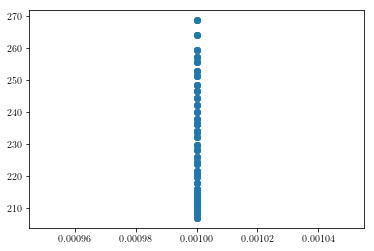

In [1268]:
plt.plot(dp_p,m_p,'o')

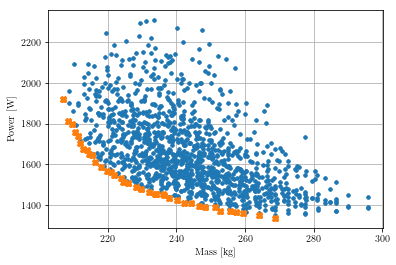

In [1254]:
plt.plot(m_T,W_T,'.')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.ylim(0,2000)
#plt.xlim(420,900)
plt.savefig('Optimum_red_2Hz.png',format = 'png', dpi=500,bbox_inches='tight')

In [1151]:
m_700 = m_p
W_700 = W_pa

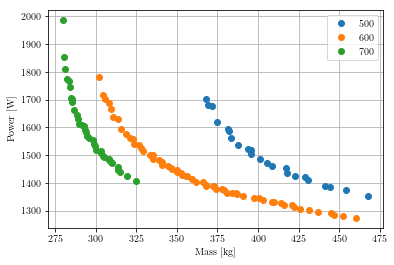

In [1152]:
#plt.plot(m_35,W_35,'o',label = 'Epsilon = 0.35')
#plt.plot(m_45,W_45,'o',label = 'Epsilon = 0.45')
#plt.plot(m_55,W_55,'o',label = 'Epsilon = 0.55')
#plt.plot(m_65,W_65,'o',label = 'Epsilon = 0.55')

plt.plot(m_500,W_500,'o',label = '500')
plt.plot(m_600,W_600,'o',label = '600')
plt.plot(m_700,W_700,'o',label = '700')

#plt.plot(m_2,W_2,'o',label = 'f = 2 Hz')
#plt.plot(m_3,W_3,'o',label = 'f = 3 Hz')
#plt.plot(m_3100,W_3100,'o',label = 'Ret - 1 Hz')
#plt.plot(m_3300,W_3300,'o',label = 'Ret - 1 Hz')

plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend()
plt.grid()
plt.savefig('Freq_Effect.png',format = 'png', dpi=500,bbox_inches='tight')

In [295]:
Q_c_new = [[] for i in range(len(m_p))]
m_flow_new = [[] for i in range(len(m_p))]


for i in range(len(m_p)):
    m_flow = np.arange(m_f_p[i]+5,1200,5)
    #print(m_f_p[i])
    for j in range(len(m_flow)):
        A = Optimal(m_flow[j]/3600,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i]+273.15,The_p[i]+273.15,L_xt_p[i])
        #print(m_flow[j],A[0],i,j,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i])
        Q_c_new[i].append(A[0])
        m_flow_new[i].append(m_flow[j])

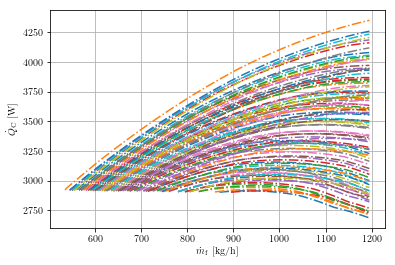

In [296]:
for i in range(len(m_p)):
    plt.plot(m_flow_new[i],Q_c_new[i],'-.')
#plt.ylim(2900,4700)
plt.grid()
#plt.legend()
plt.xlabel(r'$\dot{m}_\mathrm{f}$ [kg/h]')
plt.ylabel(r'$\dot{Q}_\mathrm{C}$ [W]')
plt.savefig('Extra.png',format = 'png', dpi=1000,bbox_inches='tight')

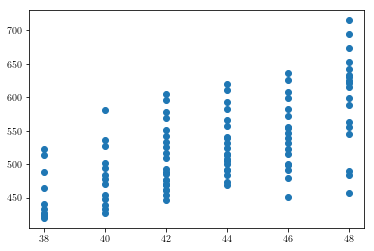

In [488]:
plt.plot(W_p,m_p,'o')

In [1182]:
m_quad = m_p
W_quad = W_pa

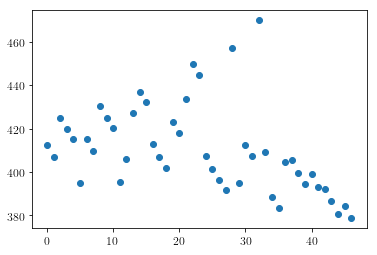

In [1037]:
plt.plot(R4_p,'o')

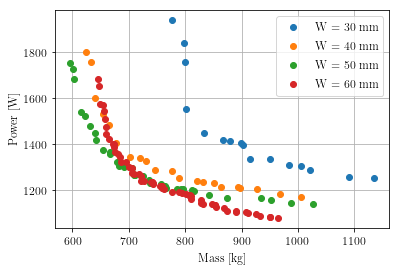

In [926]:
#plt.plot(m_2900,W_2900,'o', label = '$\dot{Q}_\mathrm{C}$ = 2900 W')
#plt.plot(m_3100,W_3100,'o', label = '$\dot{Q}_\mathrm{C}$ = 3100 W')
#plt.plot(m_3300,W_3300,'o', label = '$\dot{Q}_\mathrm{C}$ = 3300 W')
plt.plot(m_2900_W30,W_2900_W30,'o', label = 'W = 30 mm')
plt.plot(m_2900_W40,W_2900_W40,'o', label = 'W = 40 mm')
plt.plot(m_2900_W50,W_2900_W50,'o', label = 'W = 50 mm')
plt.plot(m_2900_W60,W_2900_W60,'o', label = 'W = 60 mm')
#plt.plot(m_2900_110,W_2900_110,'o', label = 'L = 110 mm')
#plt.plot(m_2900_90,W_2900_90,'o', label = 'L = 90 mm')
#plt.plot(m_2900_80,W_2900_80,'o', label = 'L = 80 mm')
#plt.plot(m_2900_2,W_2900_2,'o', label = 'f = 2 Hz')
#plt.plot(m_2900_4,W_2900_4,'o', label = 'f = 4 Hz')
#plt.plot(m_2900_2,W_2900_2,'x', label = '$\dot{Q}_\mathrm{C}$ = 2900 W')
#plt.plot(m_3300_2,W_3300_2,'x', label = '$\dot{Q}_\mathrm{C}$ = 3300 W')
#plt.plot(m_3500_2,W_3500_2,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_3500_3,W_3500_3,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_3500_5,W_3500_5,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_3500_10,W_3500_10,'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_L160,W_L160,'o', label = 'L = 160 mm')
#plt.plot(m_L180,W_L180,'o', label = 'W = 180 mm')

plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend()
plt.savefig('Power_W.png',format = 'png', dpi=500,bbox_inches='tight')

In [927]:
plt.plot(m_2900,2900/np.array(W_2900),'o', label = '$\dot{Q}_\mathrm{C}$ = 2900 W')
plt.plot(m_3100,3100/np.array(W_3100),'o', label = '$\dot{Q}_\mathrm{C}$ = 3100 W')
plt.plot(m_3300,3300/np.array(W_3300),'o', label = '$\dot{Q}_\mathrm{C}$ = 3300 W')
plt.plot(m_3500,3500/np.array(W_3500),'o', label = '$\dot{Q}_\mathrm{C}$ = 3500 W')
#plt.plot(m_L160,W_L160,'o', label = 'L = 160 mm')
#plt.plot(m_L180,W_L180,'o', label = 'W = 180 mm')

plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('COP [-]')
plt.legend()
plt.savefig('COP_Qc.png',format = 'png', dpi=500,bbox_inches='tight')

NameError: name 'm_2900' is not defined

In [ ]:
plt.plot(m_T,W_T,'o')
plt.plot(m_p,W_pa,'X')
plt.grid()
#plt.xlim([500,700])
#plt.ylim([1000,2500])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.savefig('Optimum_zoom_1Hz.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
dP_AMR = np.array(W_pump)/(np.array(m_f_target)/3600)*1000

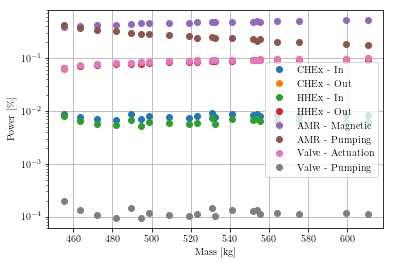

In [154]:
plt.semilogy(m_p,np.array(W_p_CHEx_p)/np.array(W_pa),'o',label = 'CHEx - In')
plt.semilogy(m_p,np.array(W_p_CHEx_f)/np.array(W_pa),'o',label = 'CHEx - Out')
plt.semilogy(m_p,np.array(W_p_HHEx_p)/np.array(W_pa),'o',label = 'HHEx - In')
plt.semilogy(m_p,np.array(W_p_HHEx_f)/np.array(W_pa),'o',label = 'HHEx - Out')
plt.semilogy(m_p,np.array(W_p_mag)/np.array(W_pa),'o',label = 'AMR - Magnetic')
plt.semilogy(m_p,np.array(W_p_pump)/np.array(W_pa),'o',label = 'AMR - Pumping')
plt.semilogy(m_p,np.array(W_pa_valve)/np.array(W_pa),'o',label = 'Valve - Actuation')
plt.semilogy(m_p,np.array(W_pa_p_valve)/np.array(W_pa),'o',label = 'Valve - Pumping')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [$\%$]')
plt.legend()
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [928]:
workbook = xlsxwriter.Workbook('Optimization_results_2900_1Hz_final.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    

workbook.close()

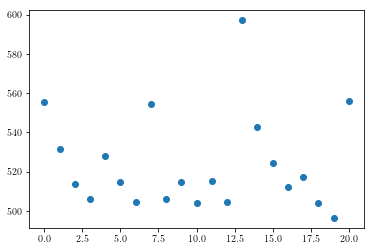

In [248]:
A = W_p_CHEx_f +W_p_CHEx_p
plt.plot(W_p_mag,'o')

In [249]:
W_pa,m_f_p

([1505.9325385702155,
  1408.515993209328,
  1278.6637081335164,
  1255.8963549384393,
  1331.1292882336797,
  1289.7027021715978,
  1257.3387598399604,
  1530.0186769854,
  1271.2489944883948,
  1244.9743944979532,
  1216.0382936285198,
  1255.1840158096345,
  1225.8265617199504,
  1656.4831817162562,
  1421.1363596077822,
  1352.467692969863,
  1311.0767726402098,
  1268.5988694139064,
  1231.6039103485286,
  1211.0831818037402,
  1556.6500786474978],
 [770.0,
  720.0,
  635.0,
  620.0,
  665.0,
  640.0,
  620.0,
  805.0,
  650.0,
  620.0,
  600.0,
  625.0,
  605.0,
  880.0,
  760.0,
  720.0,
  695.0,
  655.0,
  630.0,
  615.0,
  815.0])

In [250]:
len(W_p_valve)

1227

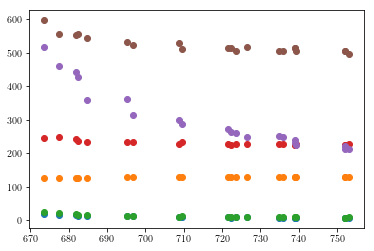

In [251]:
plt.plot(m_p,W_p_CHEx_p,'o')
plt.plot(m_p,W_p_CHEx_f,'o')
plt.plot(m_p,W_p_HHEx_p,'o')
plt.plot(m_p,W_p_HHEx_f,'o')
plt.plot(m_p,W_p_pump,'o')
plt.plot(m_p,W_p_mag,'o')

In [482]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*16 + np.array(W_pump)*16+ W_valve + W_p_valve

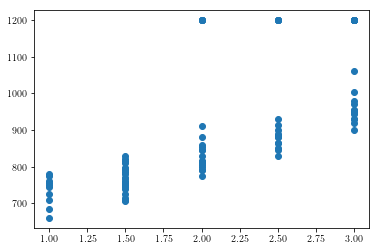

In [522]:
plt.plot(f_p,m_f_p,'o')
plt.savefig('Frequency.png',format = 'png', dpi=500,bbox_inches='tight')

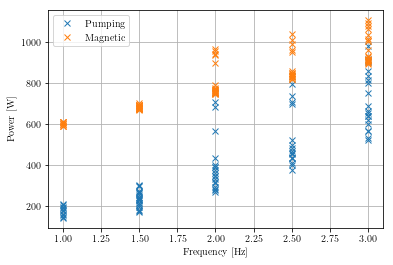

In [521]:
plt.plot(f_p,W_p_pump,'x',label = 'Pumping')
plt.plot(f_p,W_p_mag,'x',label = 'Magnetic')
plt.legend()
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [W]')
plt.savefig('Frequency.png',format = 'png', dpi=500,bbox_inches='tight')

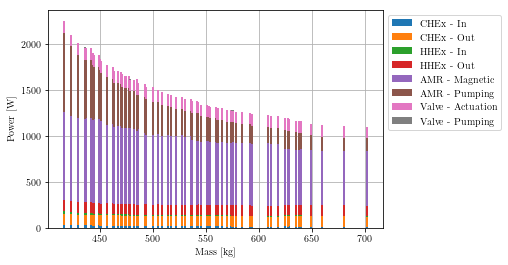

In [509]:
width = 2
plt.grid(zorder = 0)
plt.bar(m_p,W_p_CHEx_p, width, label = 'CHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = W_p_CHEx_p, label = 'CHEx - Out',zorder = 3)
plt.bar(m_p,W_p_HHEx_p, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f), label = 'HHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p), label = 'HHEx - Out',zorder = 3)
plt.bar(m_p,W_p_mag, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f), label = 'AMR - Magnetic',zorder = 3)
plt.bar(m_p,W_p_pump, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) , label = 'AMR - Pumping',zorder = 3)
plt.bar(m_p,W_pa_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f) + np.array(W_p_mag) + np.array(W_p_pump) , label = 'Valve - Actuation',zorder = 3)
plt.bar(m_p,W_pa_p_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) + np.array(W_p_pump)+ np.array(W_pa_valve), label = 'Valve - Pumping',zorder = 3)

#plt.xlim([575,865])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [484]:
m_La = np.pi*(np.array(R3)**2-np.array(R2)**2)*np.array(L_target)*(1-0.45)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+40)**2-np.array(R4)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(0.465)*1000*10**-9)

In [485]:
m_La_p = np.pi*(np.array(R3_p)**2-np.array(R2_p)**2)*np.array(L_p)*(1-0.45)*7000*10**-9
m_Rt_p = np.pi*((np.array(R4_p))**2-np.array(R3_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2
m_St_p = np.pi*((np.array(R2_p)**2))*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500
m_Fe_p_10 = np.pi*((np.array(R4_p)+10)**2-np.array(R4_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_20 = np.pi*((np.array(R4_p)+20)**2-(np.array(R4_p)+10)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_40 = np.pi*((np.array(R4_p)+40)**2-(np.array(R4_p)+20)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_80 = np.pi*((np.array(R4_p)+80)**2-(np.array(R4_p)+40)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 

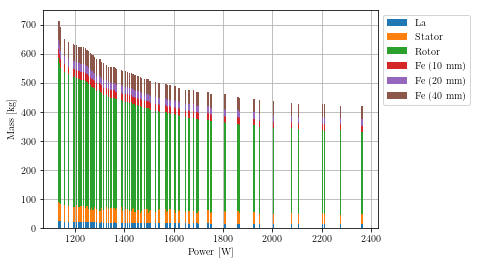

In [486]:
width = 5
plt.grid(zorder = 0)
plt.bar(W_pa,m_La_p, width, label = 'La',zorder = 3)
plt.bar(W_pa,m_St_p, width,bottom = m_La_p, label = 'Stator',zorder = 3)
plt.bar(W_pa,m_Rt_p, width,bottom = np.array(m_La_p) + np.array(m_St_p), label = 'Rotor',zorder = 3)
plt.bar(W_pa,m_Fe_p_10, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p), label = 'Fe (10 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_20, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10), label = 'Fe (20 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_40, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20), label = 'Fe (40 mm)',zorder = 3)
#plt.bar(W_pa,m_Fe_p_80, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20)+ np.array(m_Fe_p_40), label = 'Fe (80 mm)',zorder = 3)
plt.legend( bbox_to_anchor=[1, 1])
plt.ylabel('Mass [kg]')
plt.xlabel('Power [W]')
#plt.xlim(870,1300)
#plt.ylim(0,1050)
plt.savefig('Mass_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

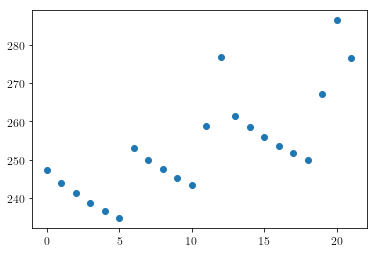

In [1591]:
plt.plot(R4_p,'o')

In [484]:
m_p,W_pa

([367.402400861069,
  398.345315962042,
  372.8456526475824,
  402.40845718959457,
  433.830910242989,
  467.02856121440635,
  382.8696921207481,
  387.6283174724972,
  410.5044001166666,
  440.2885452611251,
  472.0598790129393,
  505.7040746062123,
  400.2483965202077,
  423.9106349157607,
  451.37742090347405,
  481.2053589737194,
  477.6182089834999,
  466.057065809478,
  484.53539684062144,
  550.3606815764064],
 [1396.2981884921105,
  1067.4647171932024,
  1144.6335372320443,
  962.0860495912351,
  868.9929801223235,
  807.1608771280028,
  1098.4567484250542,
  1077.1504704109616,
  925.5806000591259,
  827.8488879621299,
  796.8268121007104,
  791.5180958874895,
  1062.7096565075608,
  914.3054675665245,
  817.6301261699194,
  791.6362740539375,
  nan,
  nan,
  nan,
  nan])

In [435]:
len(W_pa)

18

ValueError: x and y must have same first dimension, but have shapes (670,) and (216, 1)

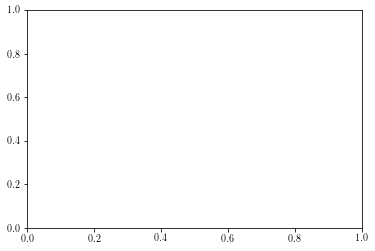

In [44]:
erro_Qc = np.arange(-100,250)
plt.plot(Q_c,np.array(Qc_rg)/16,'o')
plt.plot(erro_Qc,1.1*erro_Qc,'k--')
plt.plot(erro_Qc,0.9*erro_Qc,'k--')
plt.grid()
plt.ylabel('Analytical Cooling Capacity [W]')
plt.xlabel('Numerical Cooling Capacity [W]')
plt.xlim(100,250)
plt.ylim(100,250)
plt.savefig('Qc_fit.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
erro_Qh = np.arange(-100,350)
plt.plot(Q_h,np.array(Qh_rg)/16,'o')
plt.plot(erro_Qh,1.1*erro_Qh,'k--')
plt.plot(erro_Qh,0.9*erro_Qh,'k--')
plt.grid()
plt.ylabel('Analytical Rejected Heat [W]')
plt.xlabel('Numerical Rejected Heat [W]')
plt.xlim(120,300)
plt.ylim(120,300)
plt.savefig('Qh_fit.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
erro_Wp = np.arange(0,25)
plt.plot(W_p,W_pump_rg,'o')

plt.plot(erro_Wp,1.1*erro_Wp,'k--')
plt.plot(erro_Wp,0.9*erro_Wp,'k--')
plt.grid()
plt.ylabel('Analytical Pumping Power [W]')
plt.xlabel('Numerical Pumping Power [W]')
#plt.xlim(120,300)
#plt.ylim(120,300)

### Closure Relations

In [ ]:
plt.plot(N_r,R4,'o')

In [ ]:
plt.plot(H,np.array(R3)-np.array(R2),'o')

Regenerator arranges